In [104]:
#Importing all the requuired libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df= pd.read_csv("drive/MyDrive/Walmart DataSet.csv") # Importing the csv file

In [107]:
df.head(5)# Preview of a a dataset

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [108]:
df.info()  # information about the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [109]:
df['Date'] =pd.to_datetime(df['Date']) #Datetime Format

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


<Axes: >

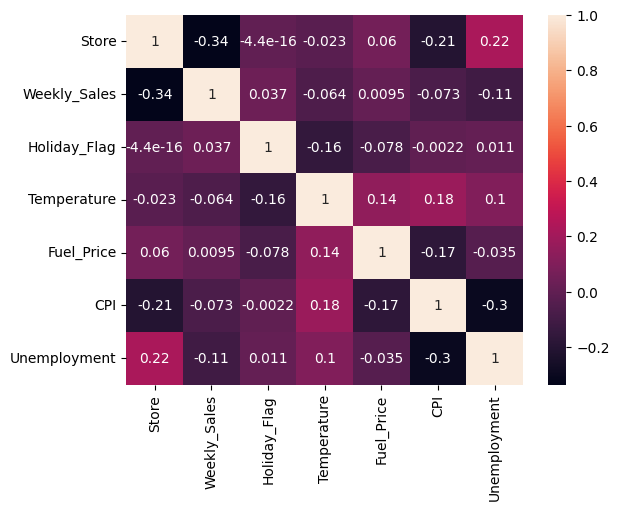

In [111]:
#Heatmap
df1=df.drop(['Date'],axis=1)
sns.heatmap(df1.corr(),annot=True)

In [112]:
df.describe() # Statistics

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

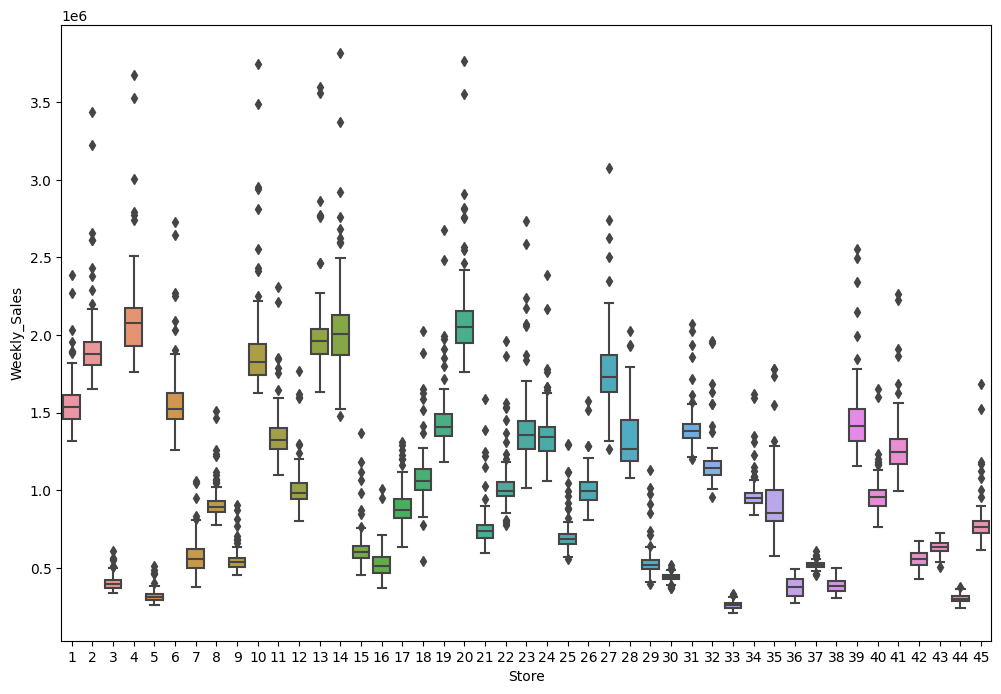

In [113]:
#Weekly sales of different stores
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Store", y="Weekly_Sales")


<Axes: xlabel='Weekly_Sales'>

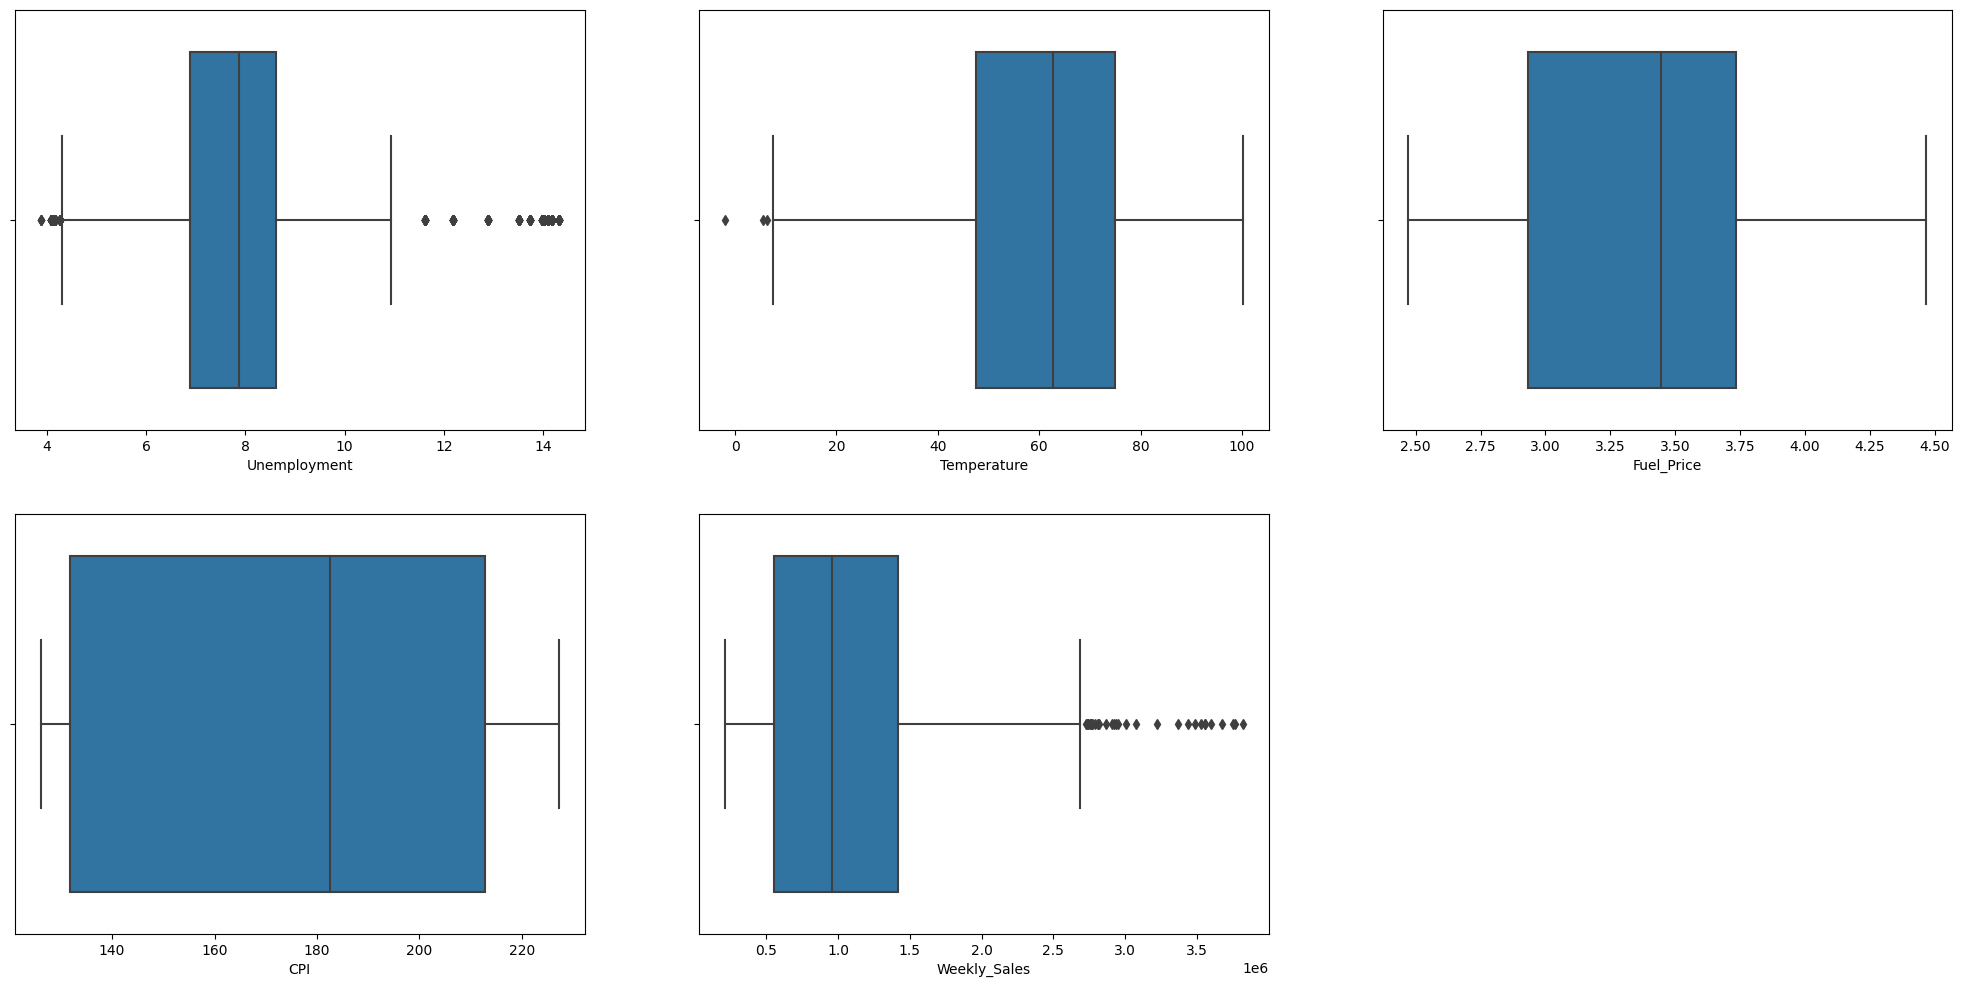

In [114]:
# Outliers Detection in different features
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
sns.boxplot(x=df['Unemployment'])
plt.subplot(2,3,2)
sns.boxplot(x=df['Temperature'])
plt.subplot(2,3,3)
sns.boxplot(x=df['Fuel_Price'])
plt.subplot(2,3,4)
sns.boxplot(x=df['CPI'])
plt.subplot(2,3,5)
sns.boxplot(x=df['Weekly_Sales'])

In [115]:
x=df.drop(['Date','Store'],axis=1)
x

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0       1643690.90             0        42.31       2.572  211.096358   
1       1641957.44             1        38.51       2.548  211.242170   
2       1611968.17             0        39.93       2.514  211.289143   
3       1409727.59             0        46.63       2.561  211.319643   
4       1554806.68             0        46.50       2.625  211.350143   
...            ...           ...          ...         ...         ...   
6430     713173.95             0        64.88       3.997  192.013558   
6431     733455.07             0        64.89       3.985  192.170412   
6432     734464.36             0        54.47       4.000  192.327265   
6433     718125.53             0        56.47       3.969  192.330854   
6434     760281.43             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  
2            8.106  
3            8.106  
4            8.106  
...            ...  
6430         8.684  
6431         8.667  
6432         8.667  
6433         8.667  
6434         8.667  

[6435 rows x 6 columns]

In [116]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))


<Axes: xlabel='Store', ylabel='Count'>

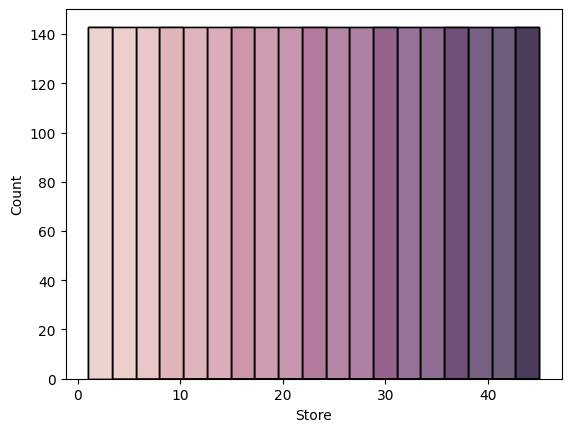

In [118]:
#Count of different stores
sns.histplot(df, x="Store",hue="Store",legend=False)

In [119]:
pd.DataFrame(df['Store'].value_counts()).sort_values(by ='Store',ascending =True)

Store
1     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
2     143
21    143
23    143
44    143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
25    143
45    143

1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

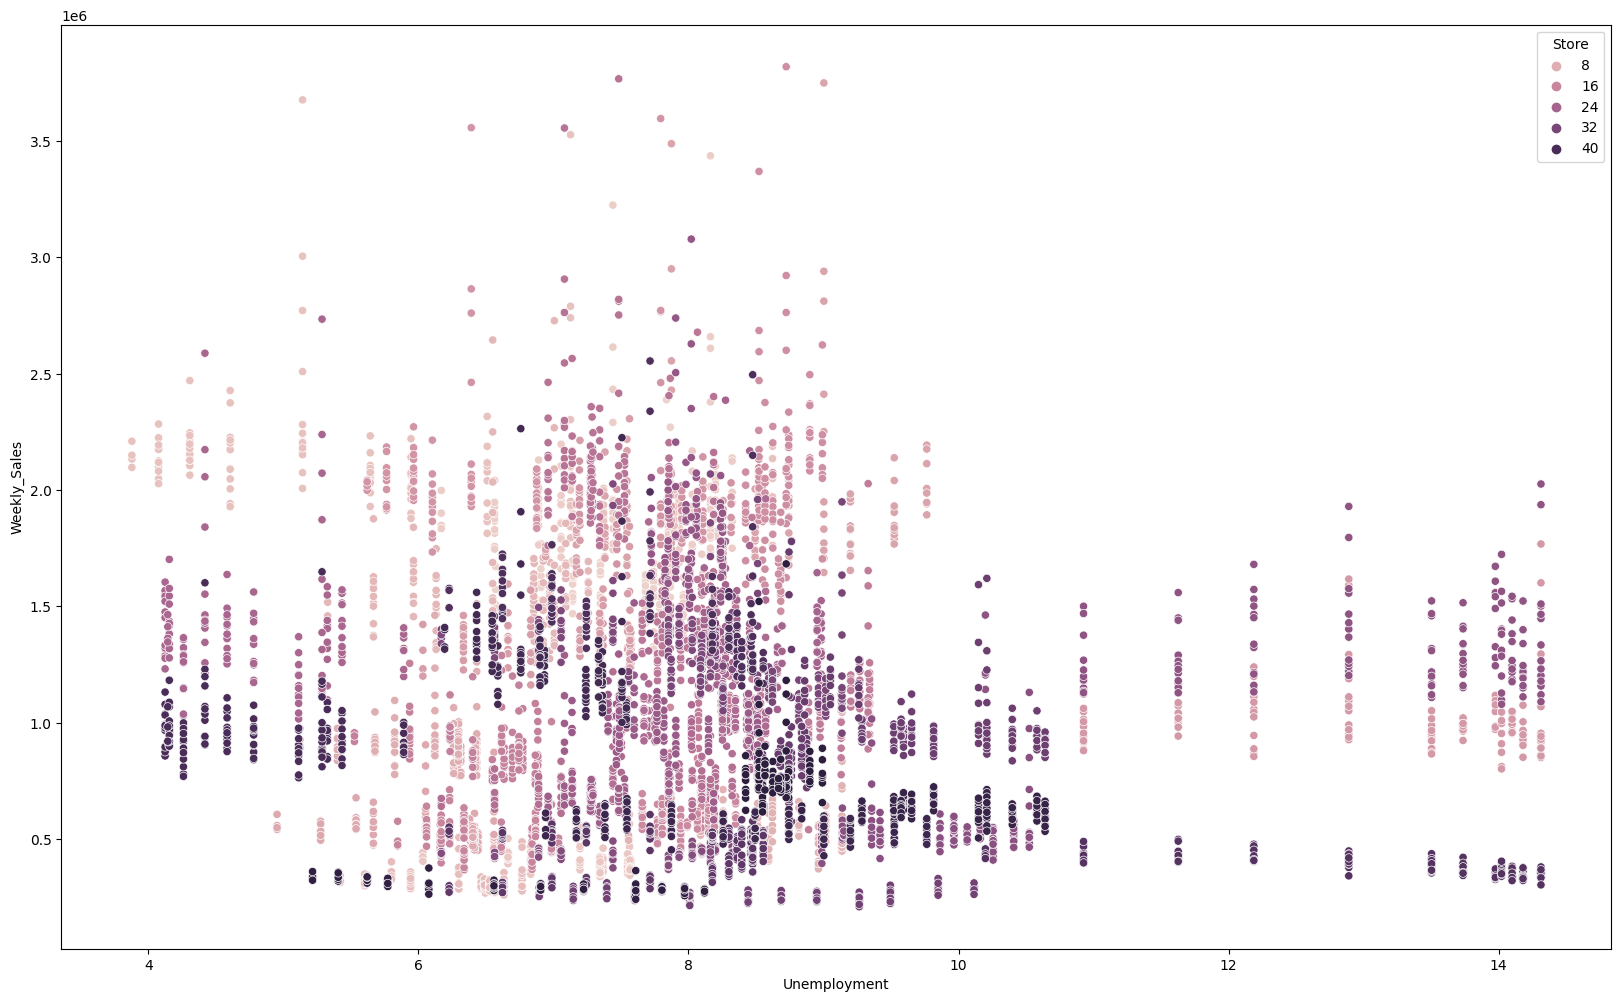

In [120]:
plt.figure(figsize=(20,12))
sns.scatterplot(y=df['Weekly_Sales'],x=df['Unemployment'],hue=df['Store'])

 If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

 Yes , Store 32 and 40 suffer the most due to the unemployment rate as it lowers the weekly sales.


In [121]:
df.Store.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

b. If the weekly sales show a seasonal trend, when and what could be the reason?

feastive Season such as Christmas or holiday, there is an increase in weekly sales.

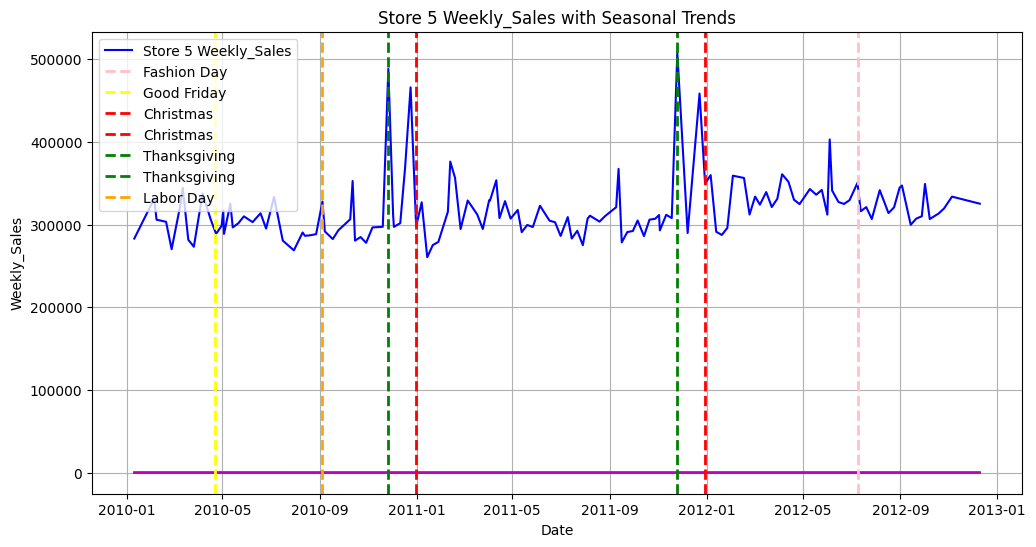

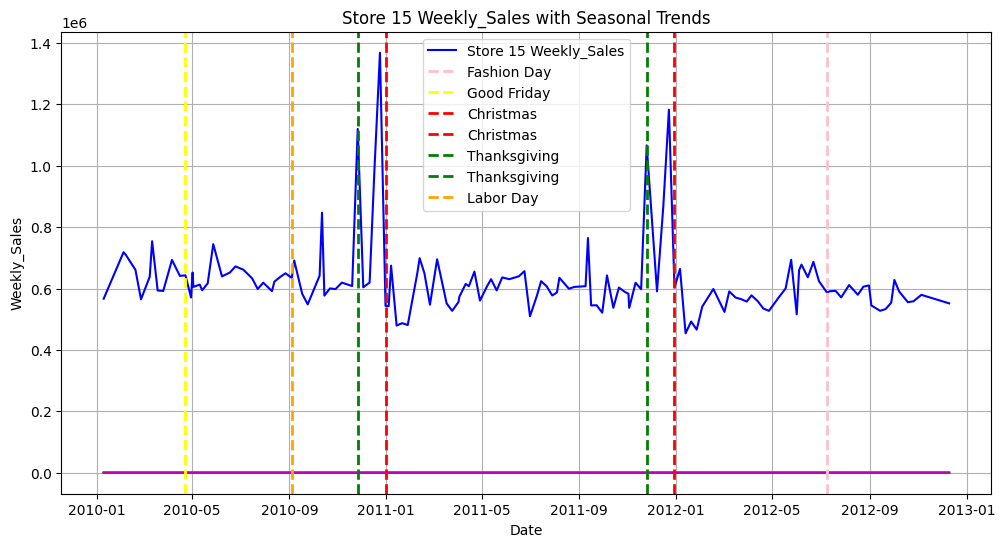

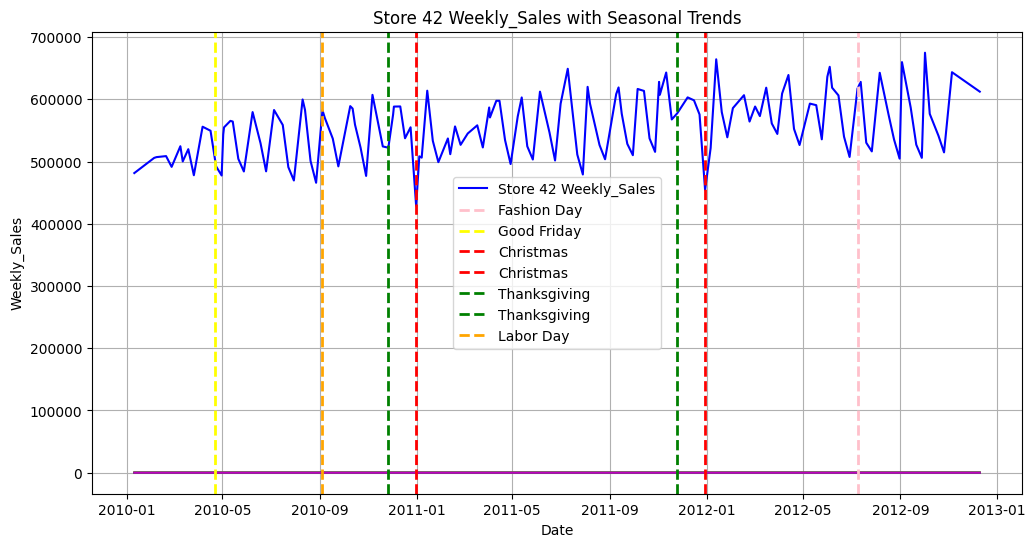

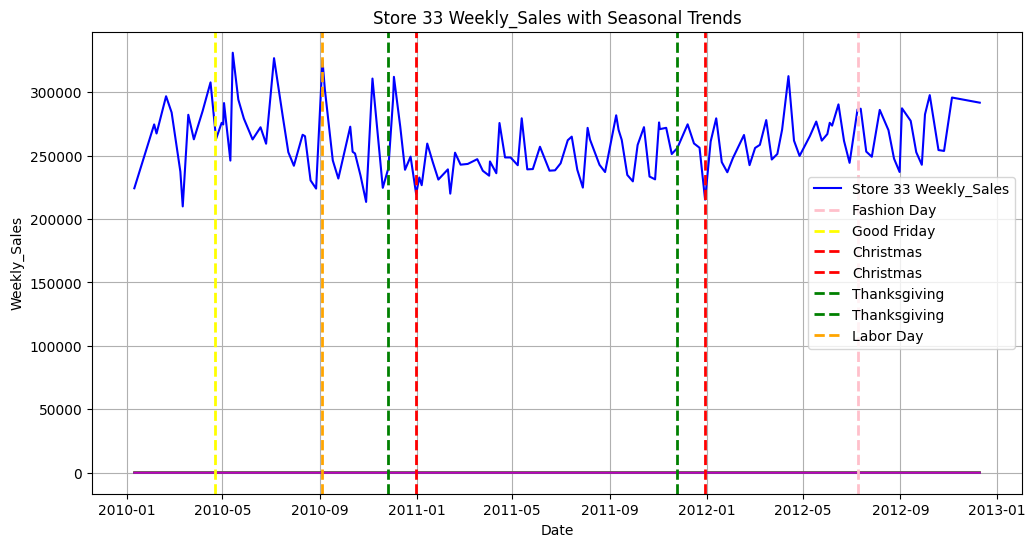

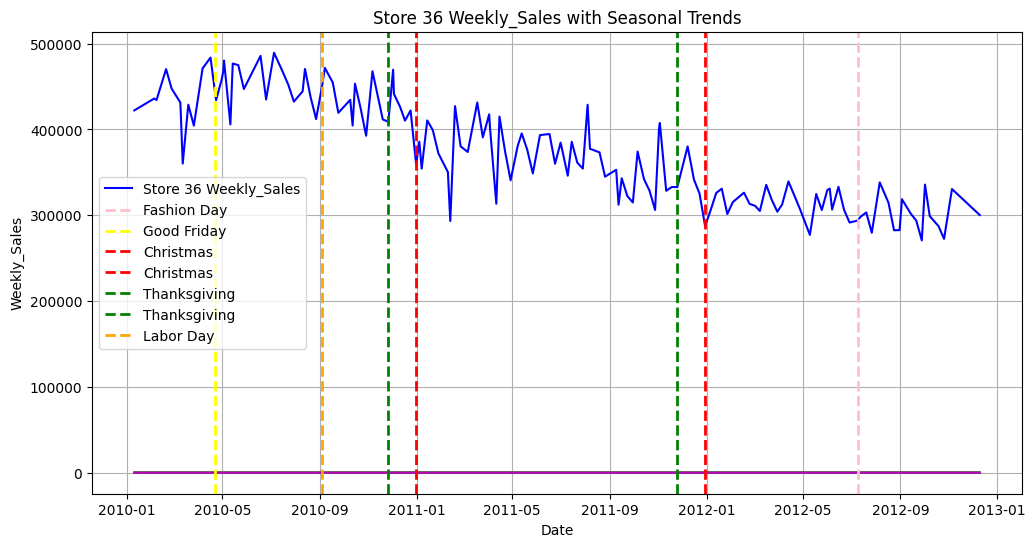

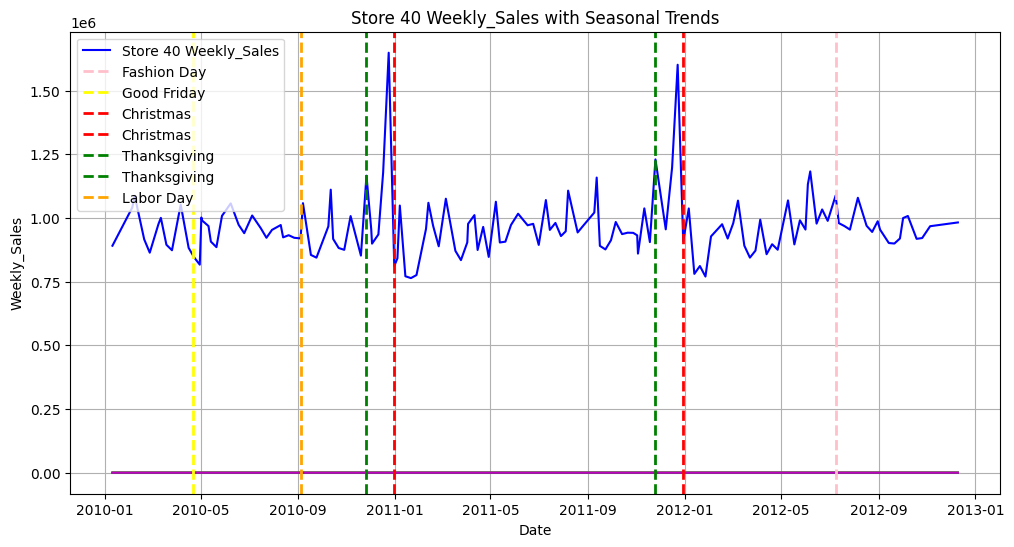

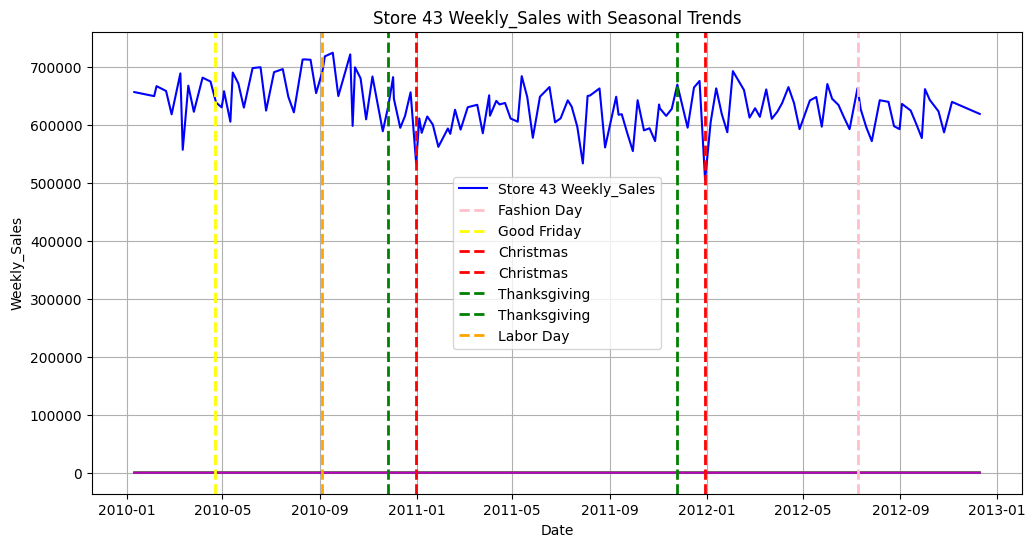

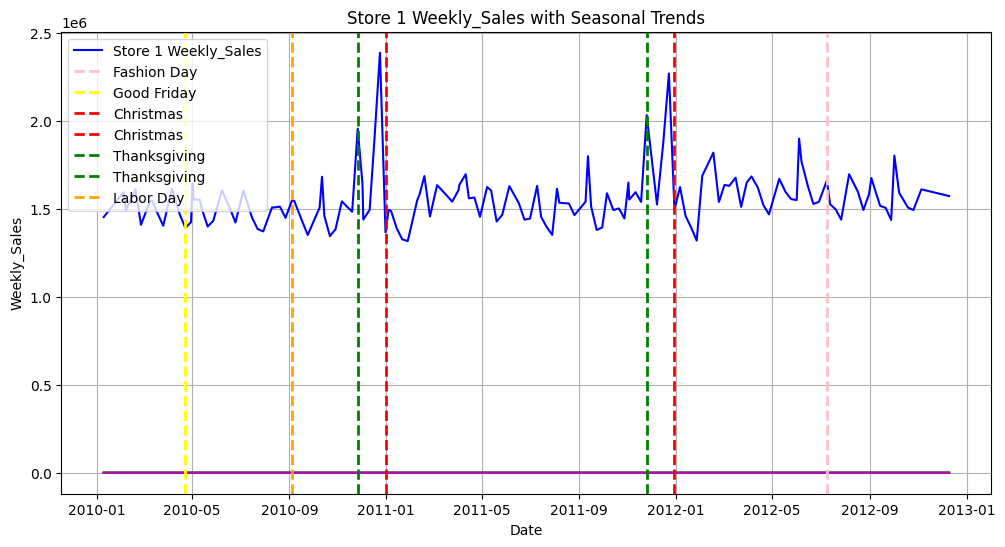

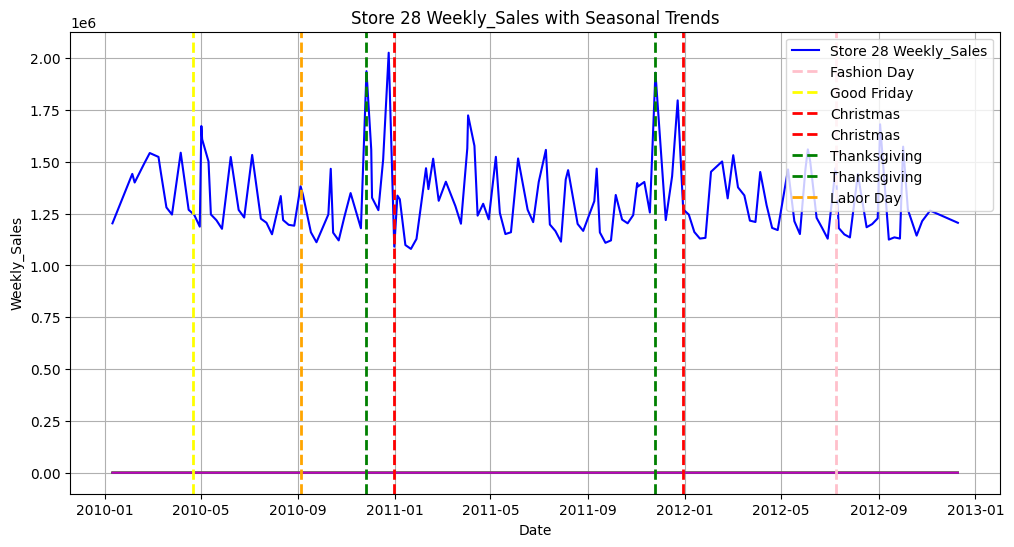

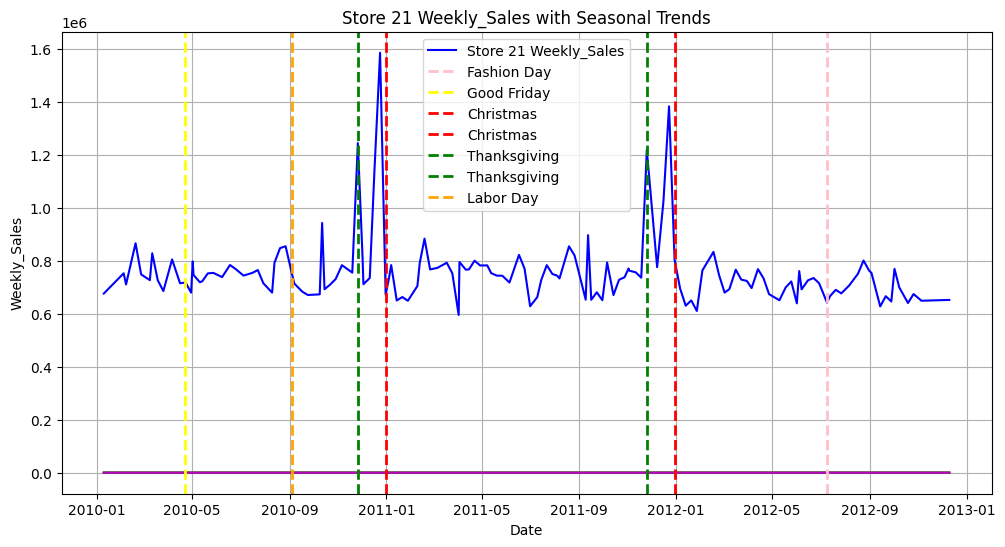

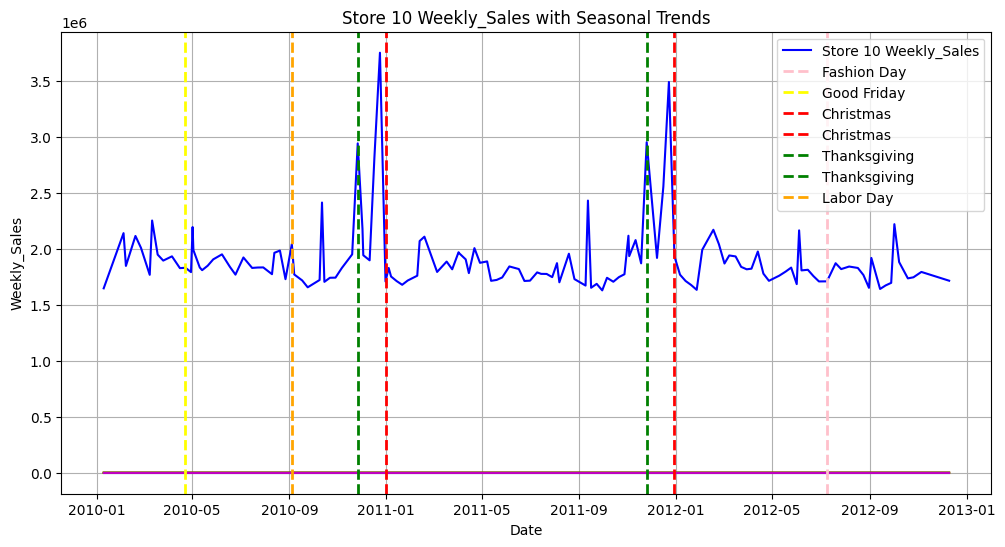

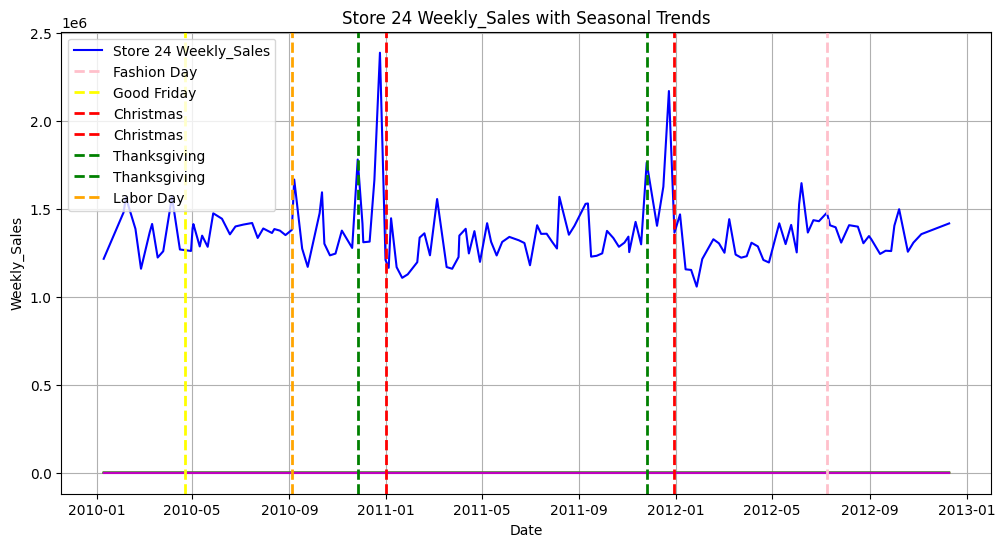

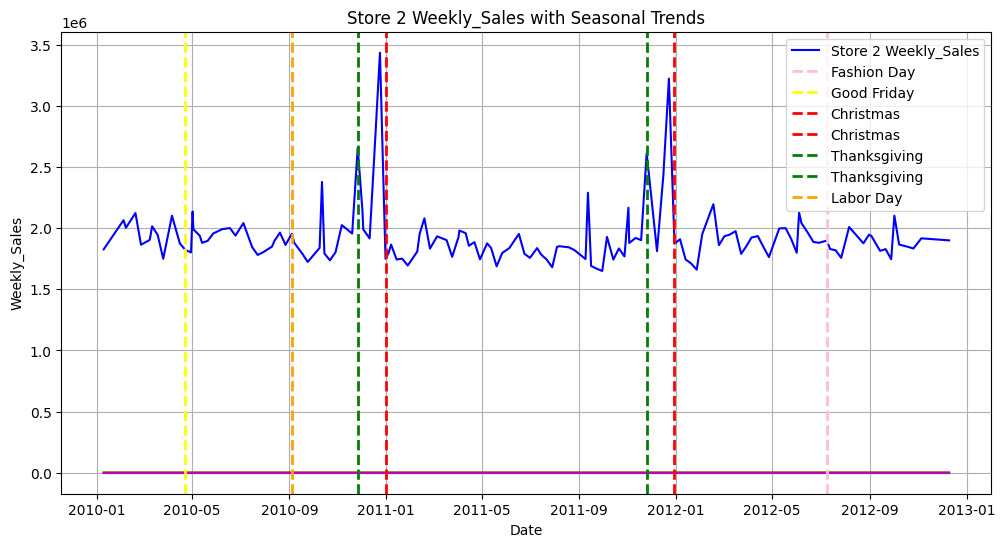

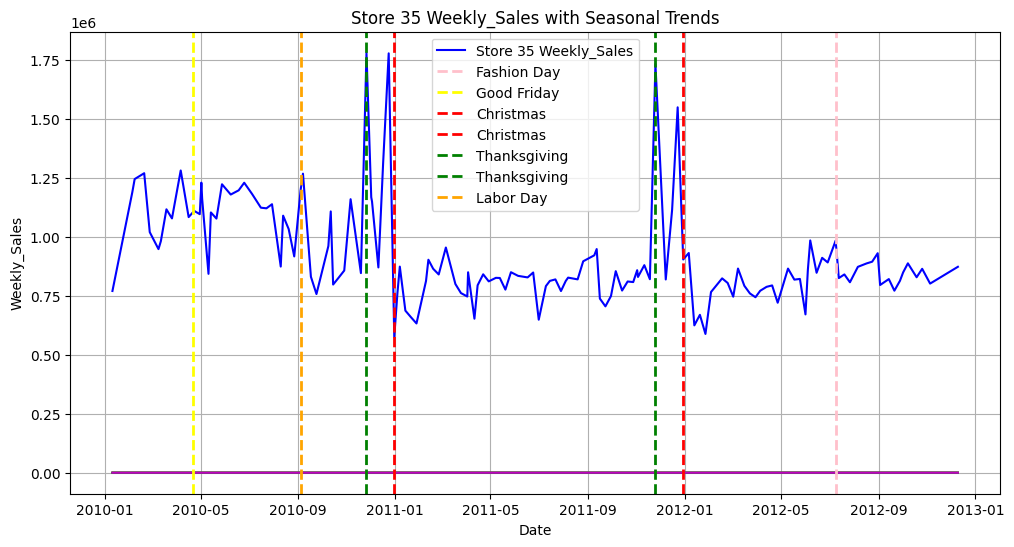

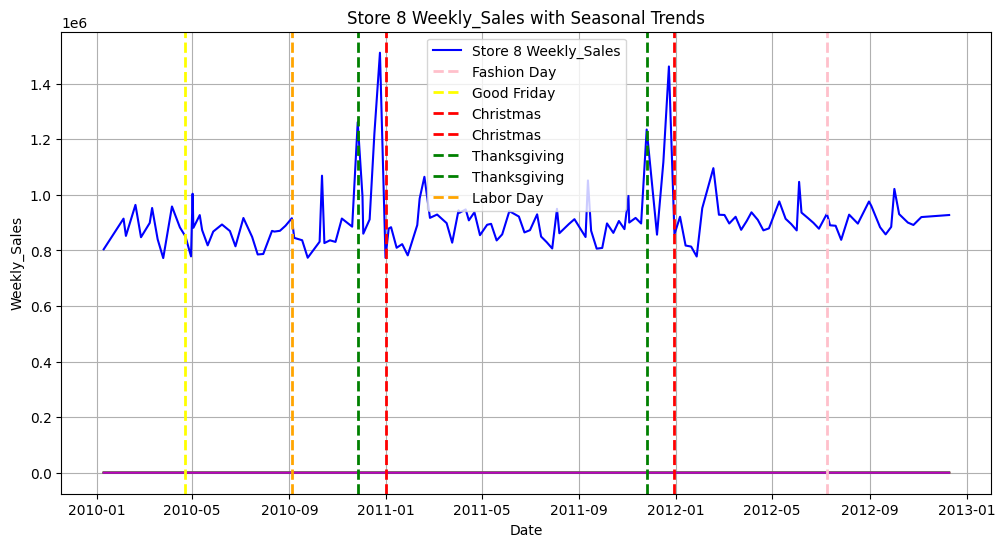

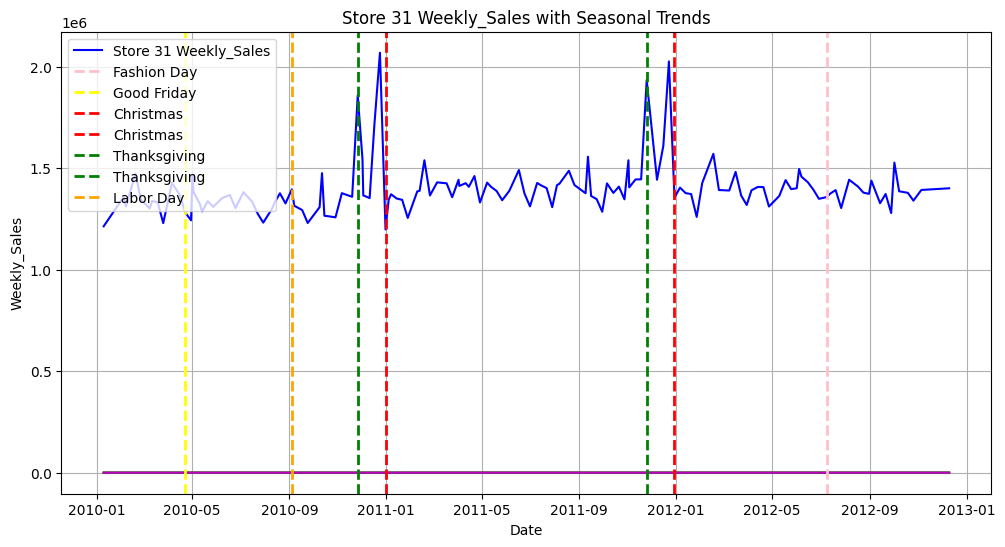

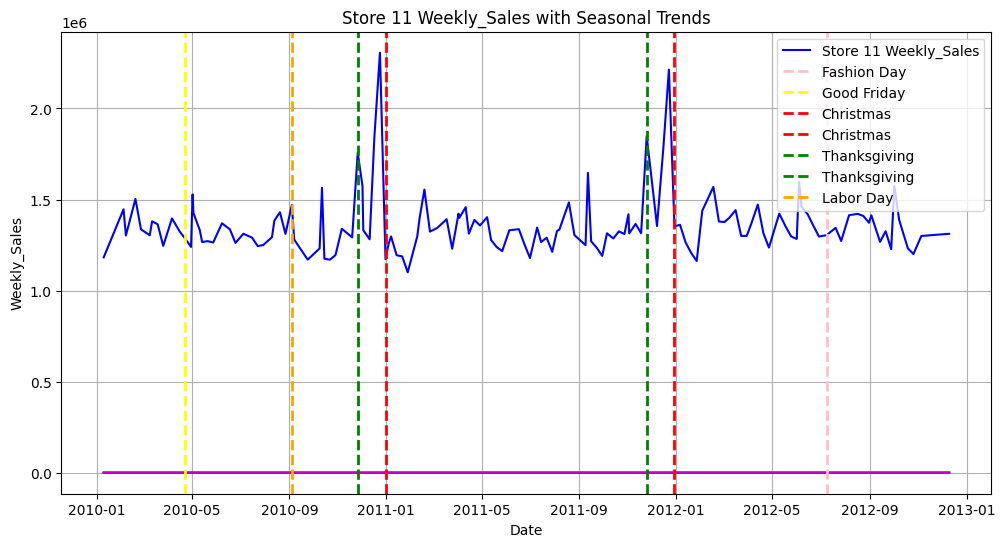

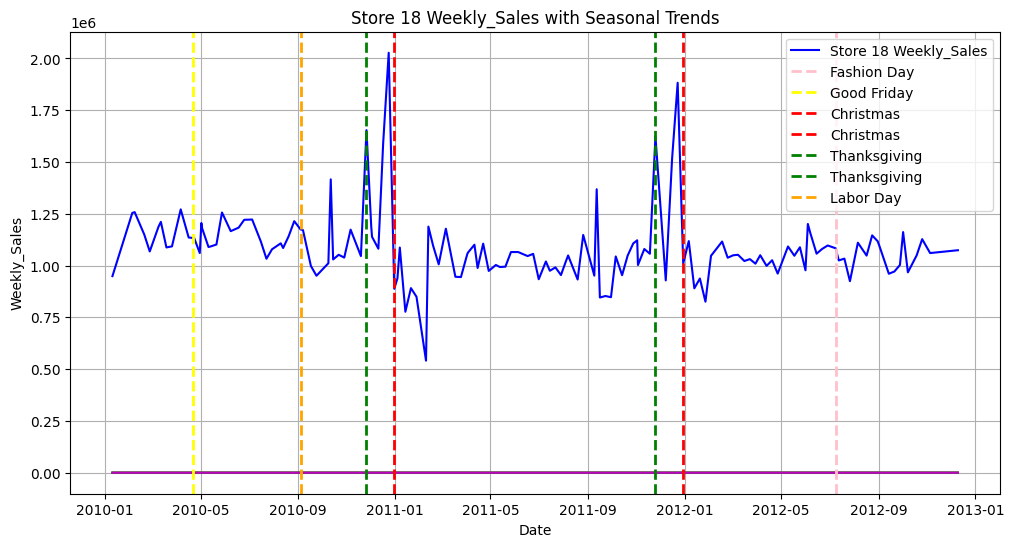

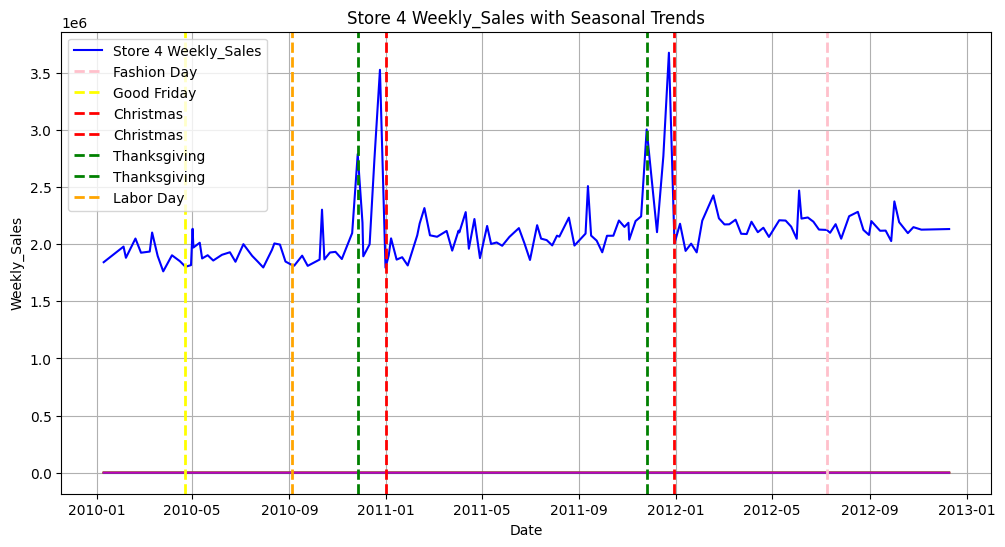

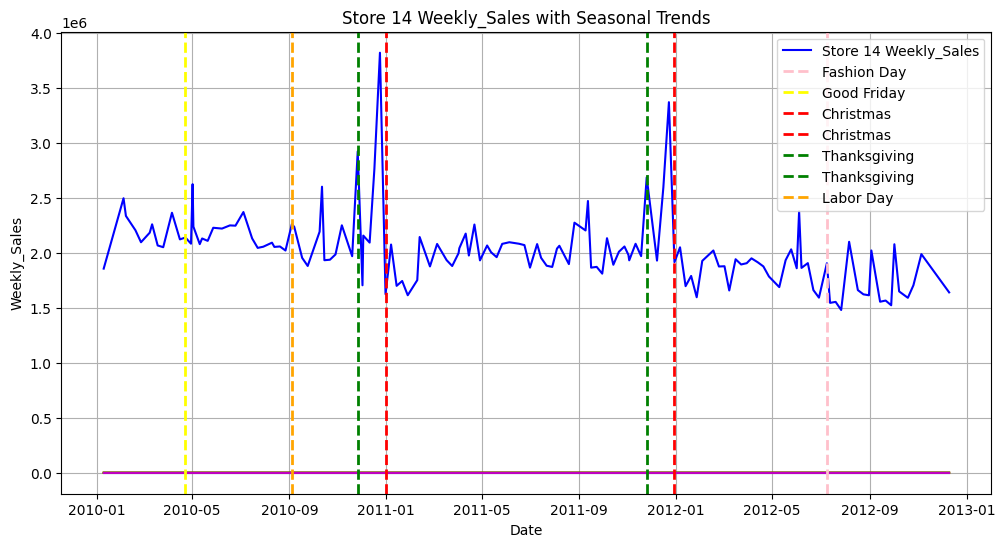

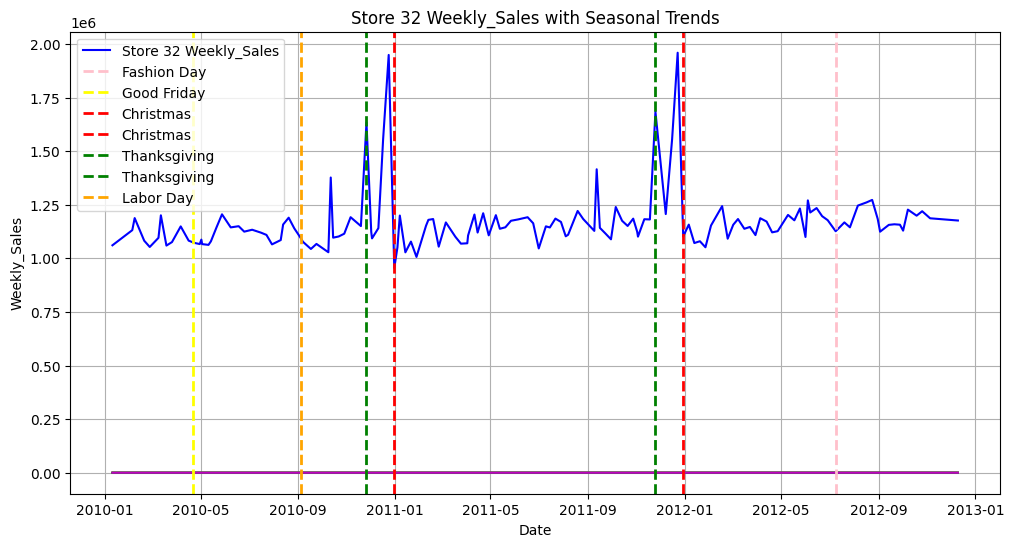

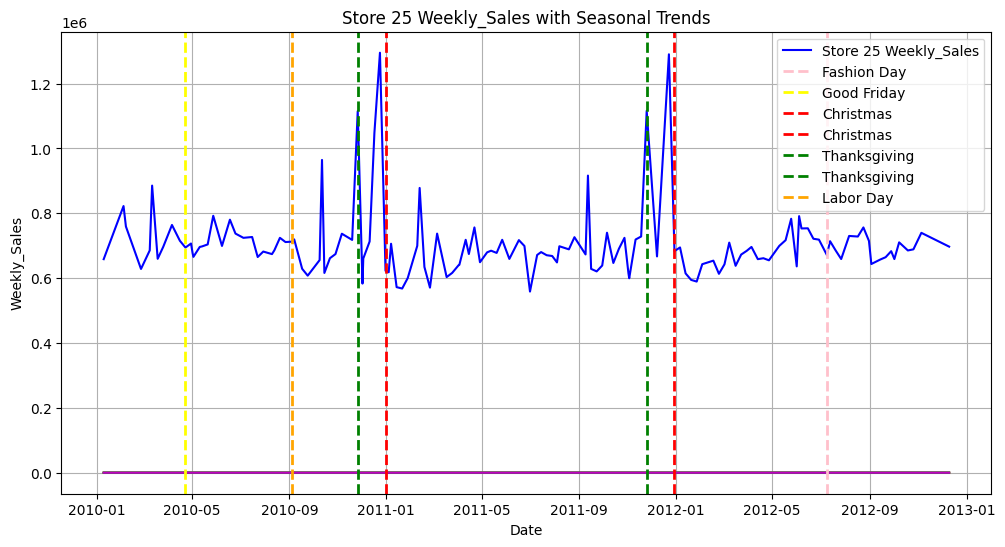

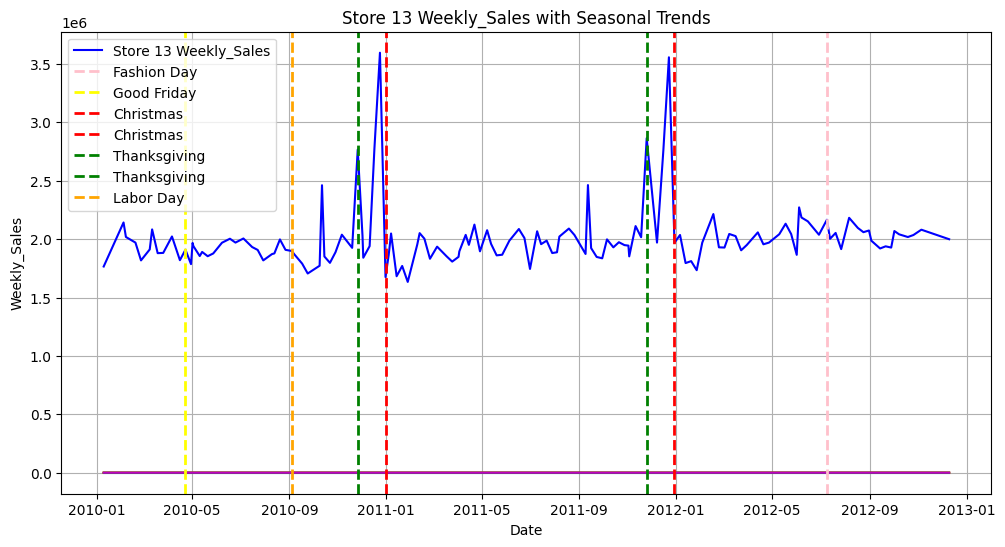

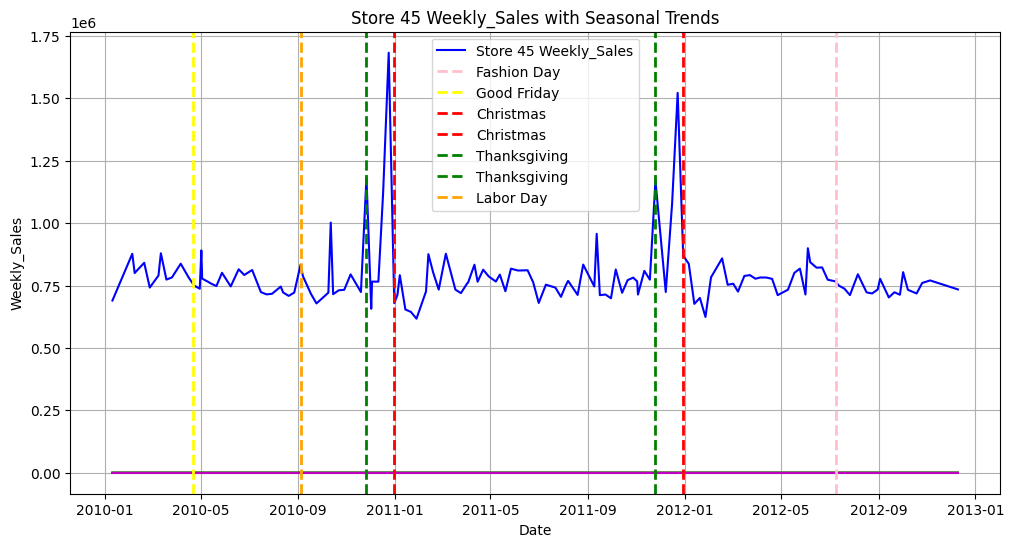

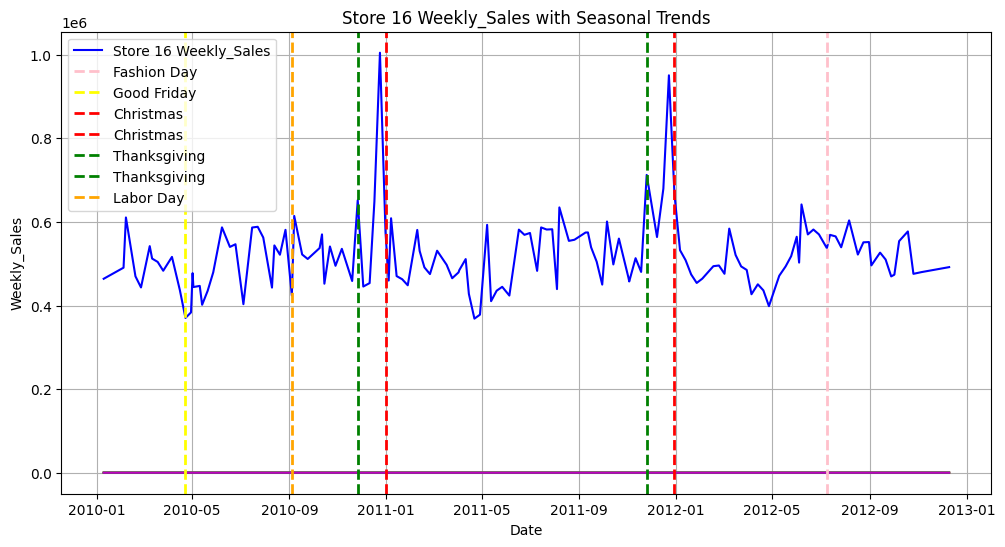

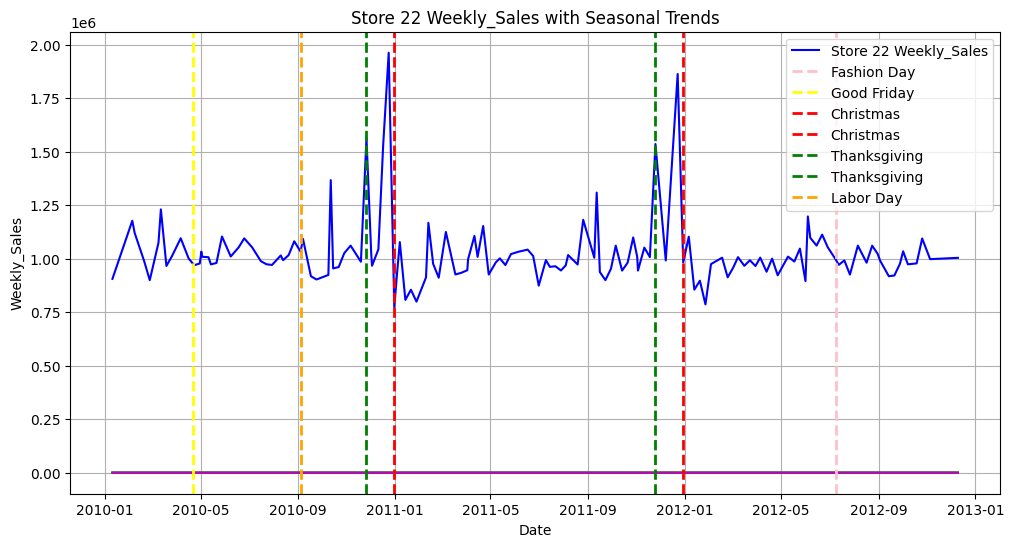

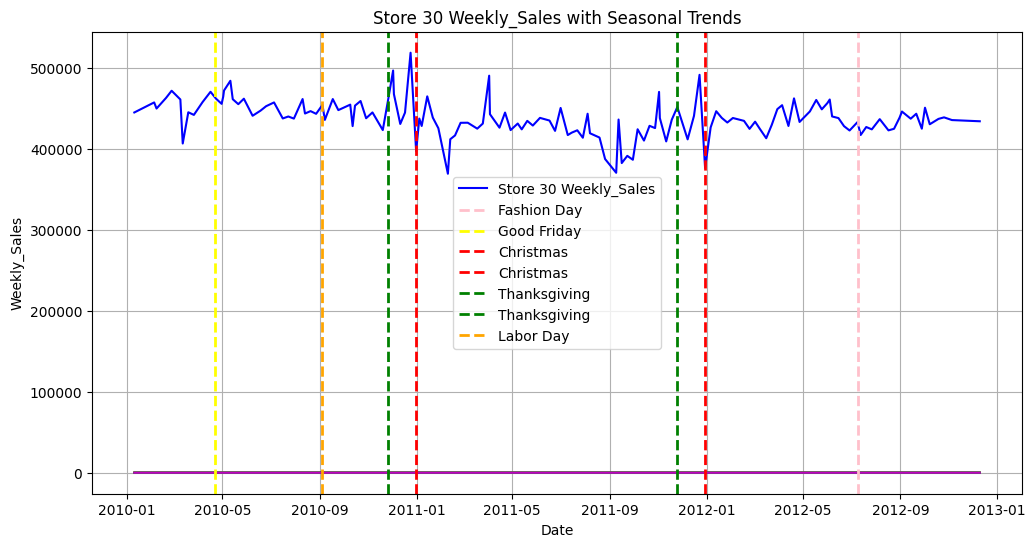

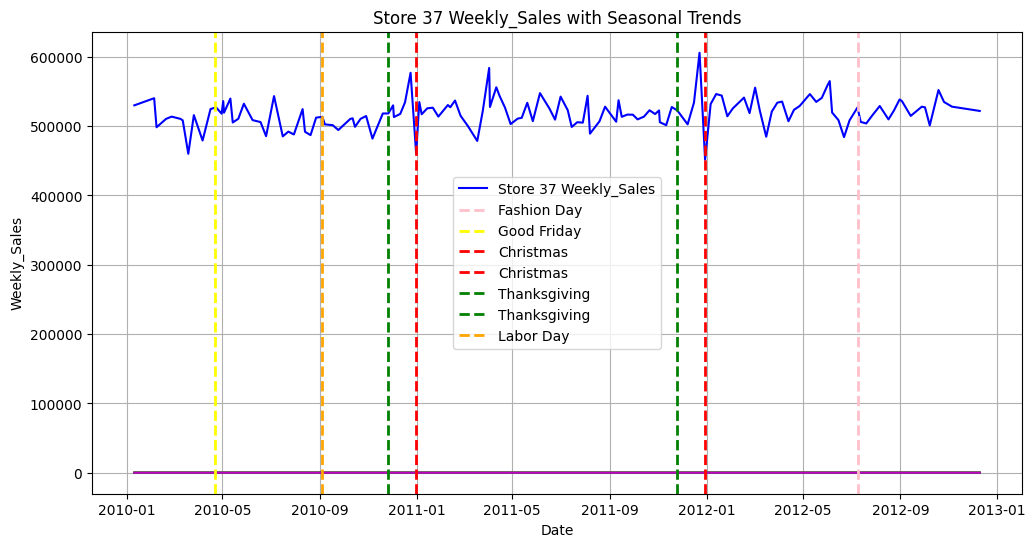

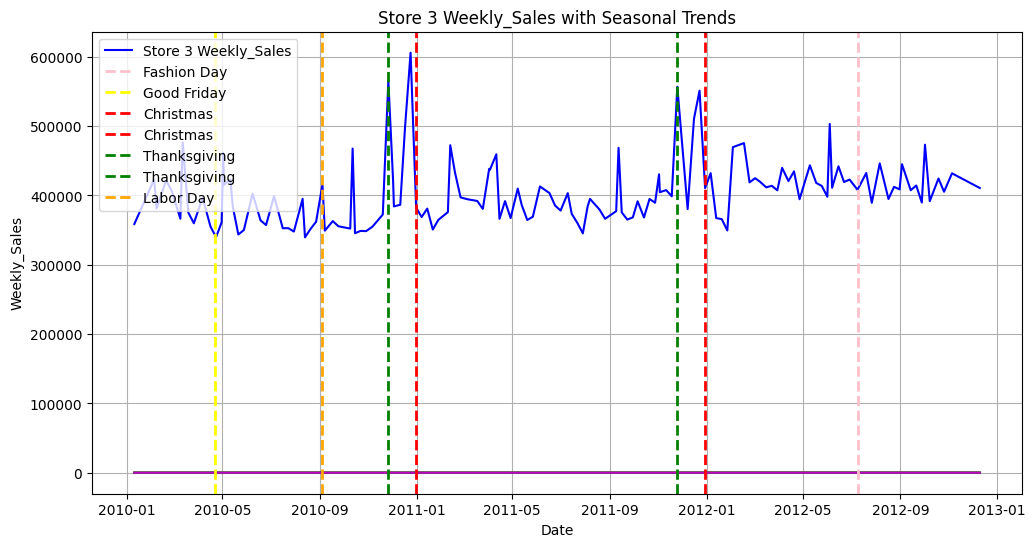

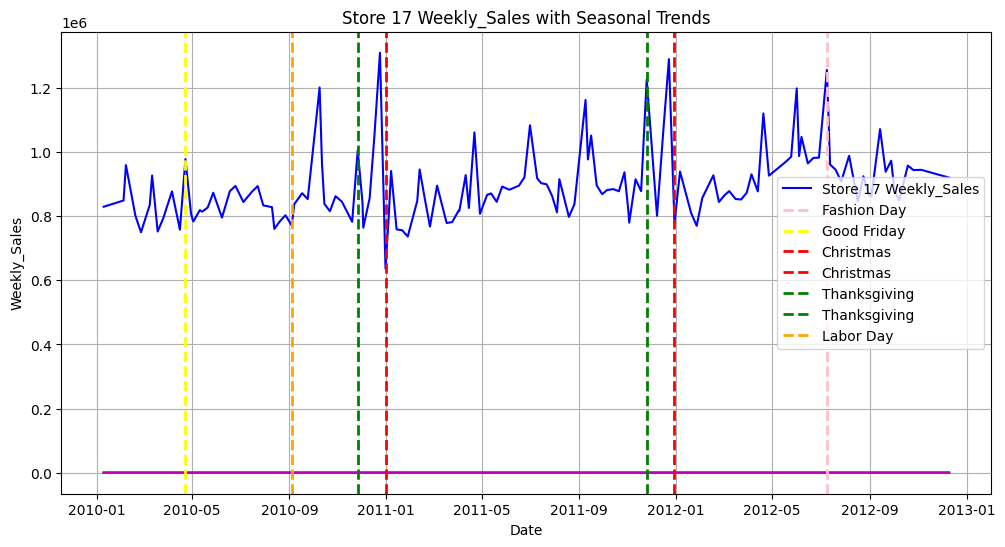

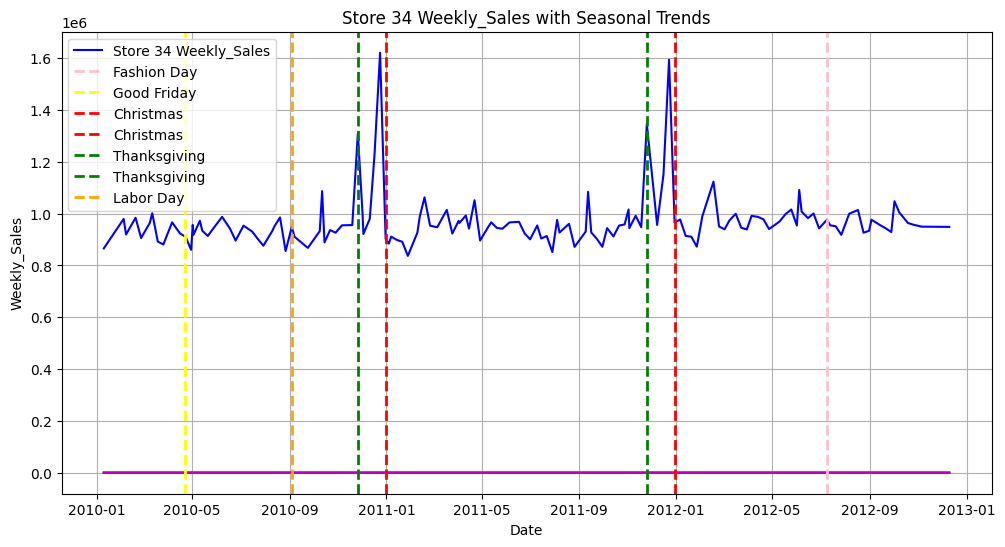

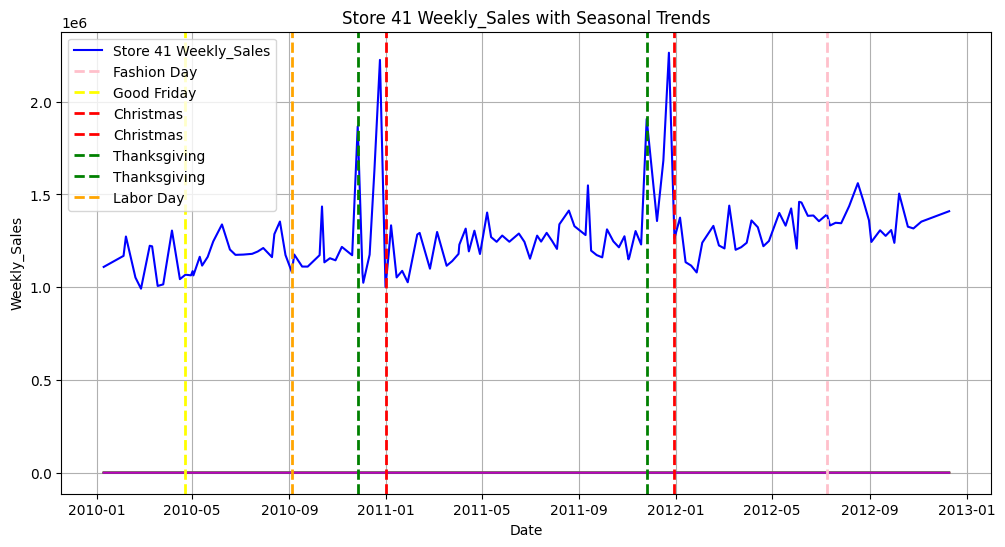

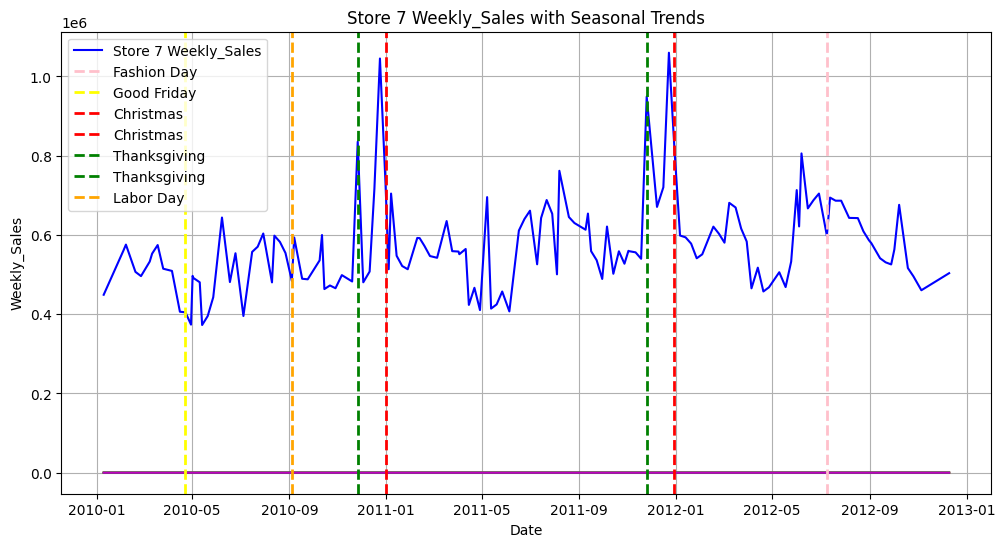

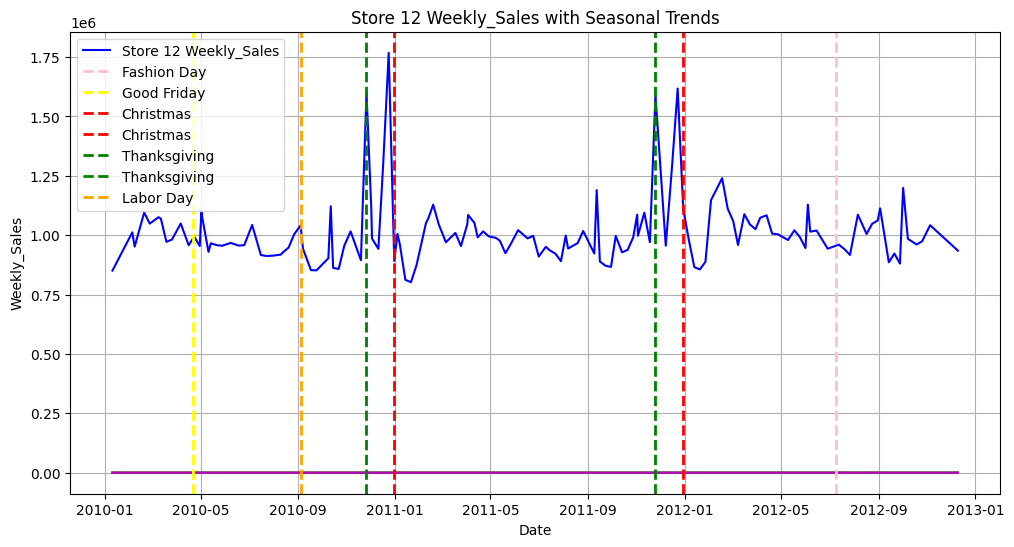

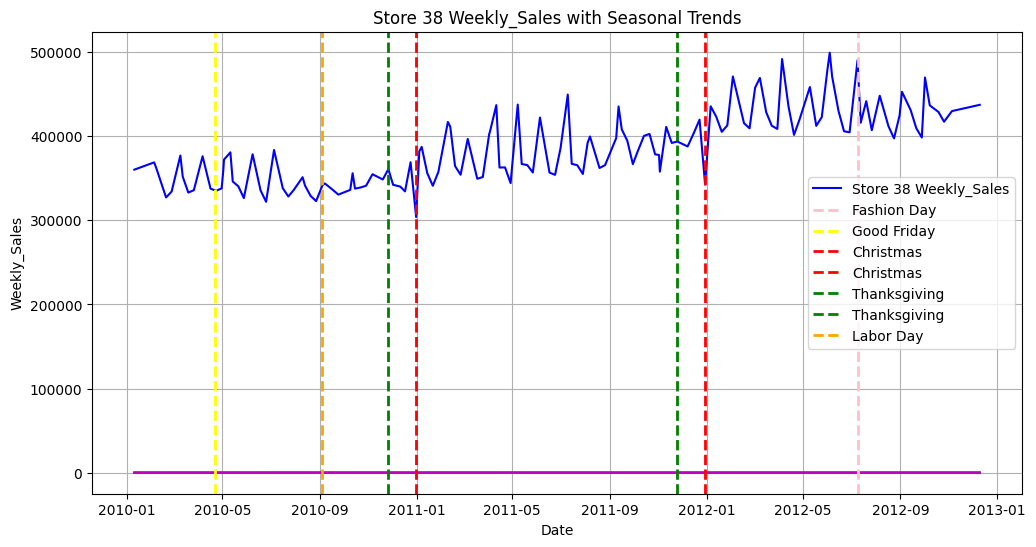

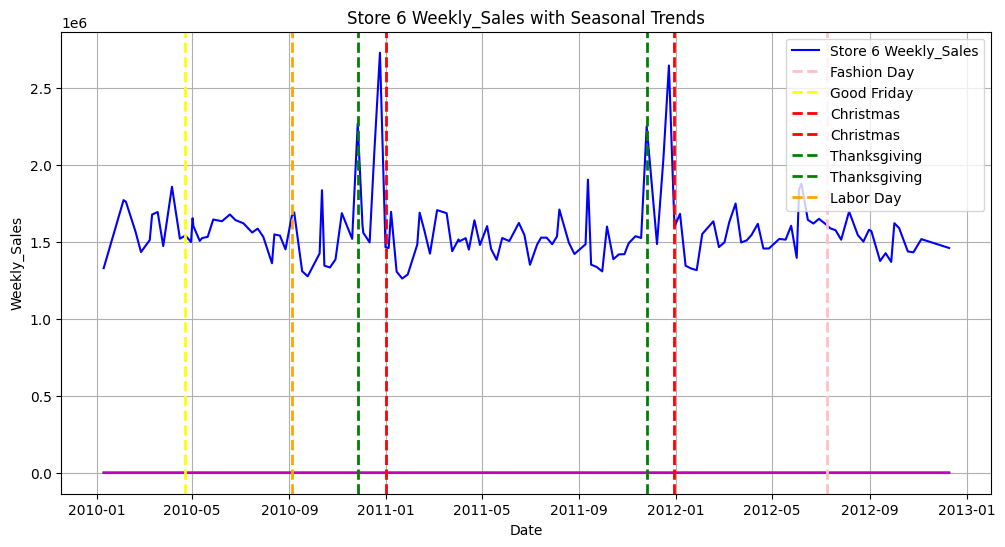

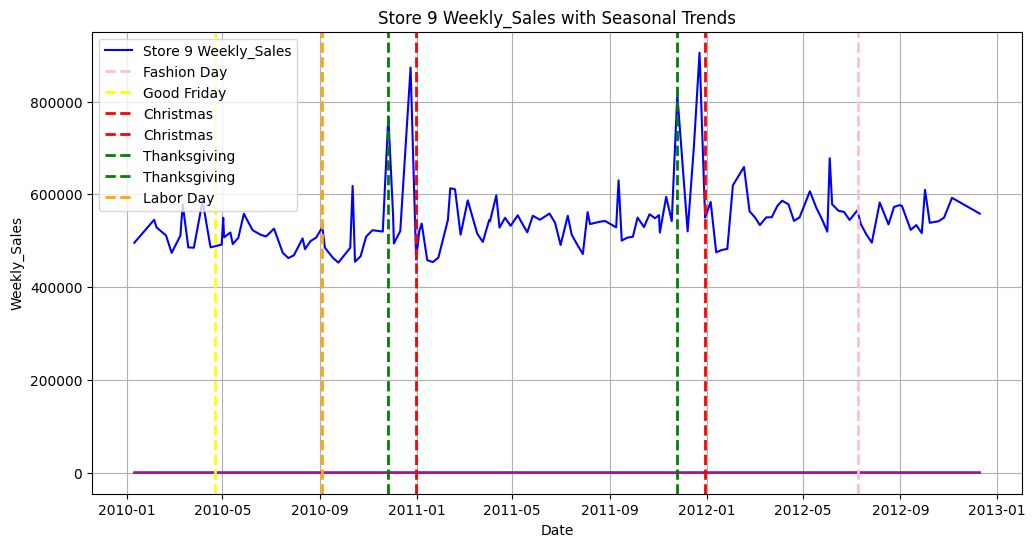

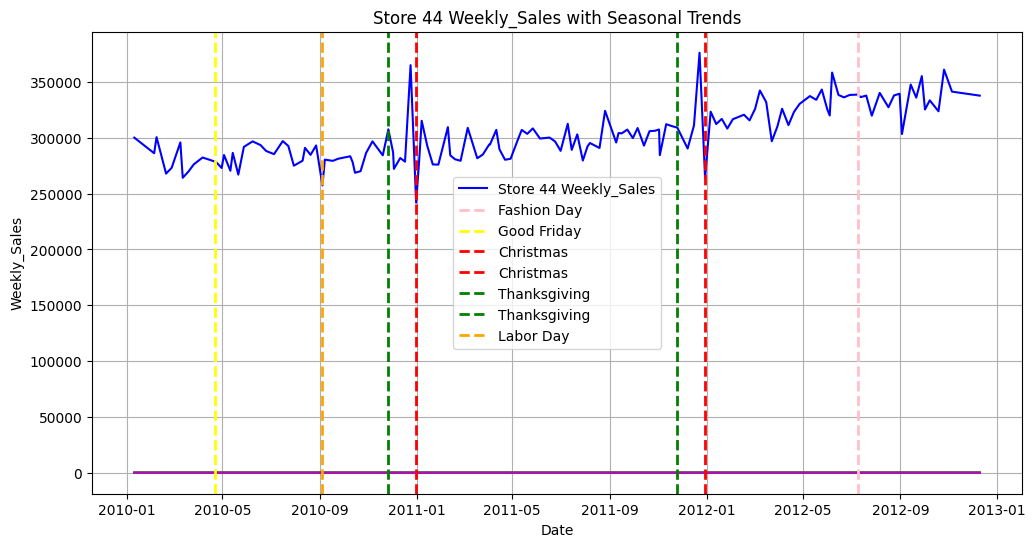

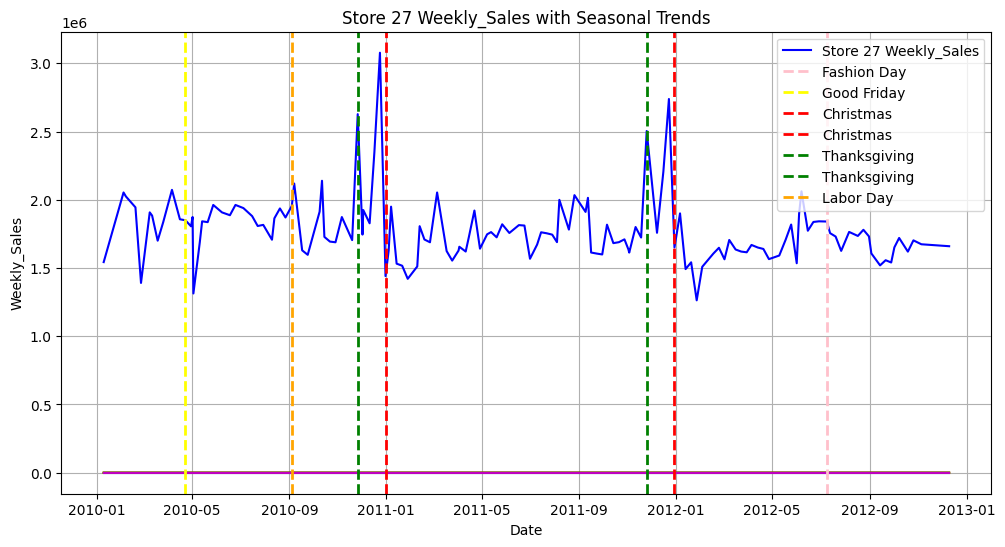

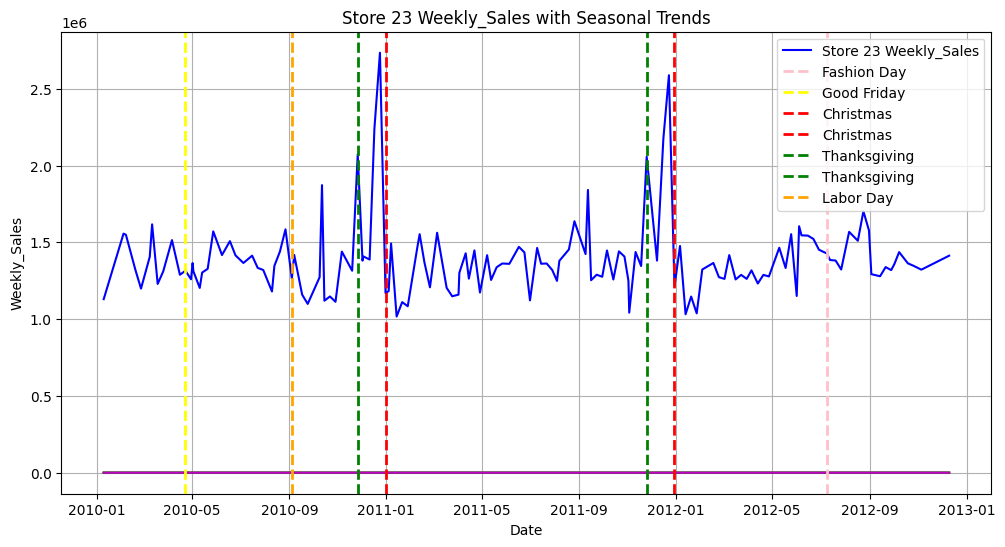

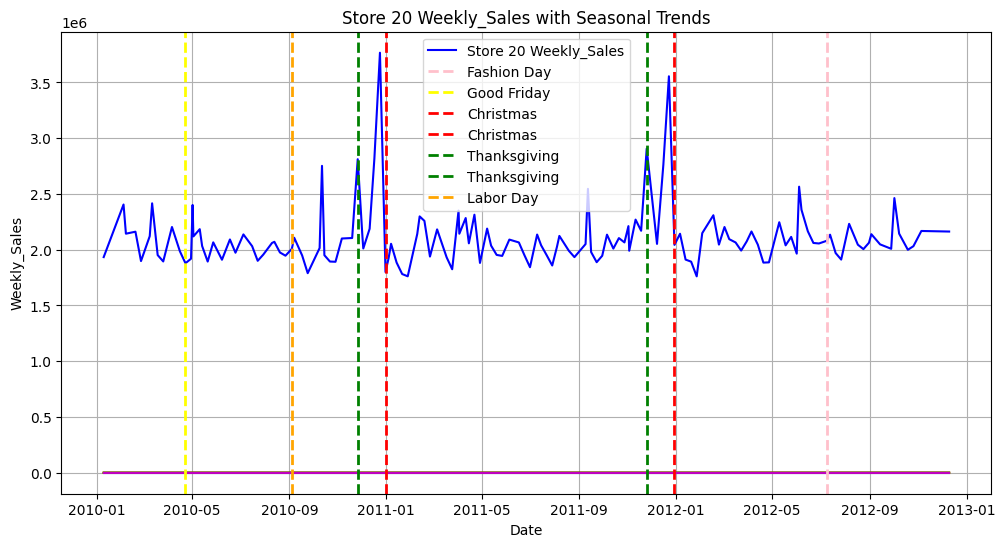

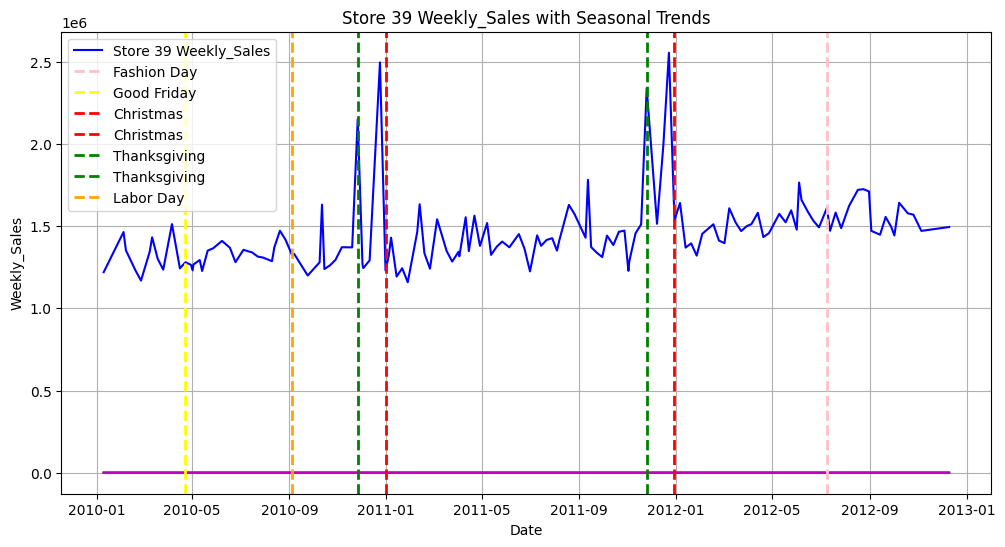

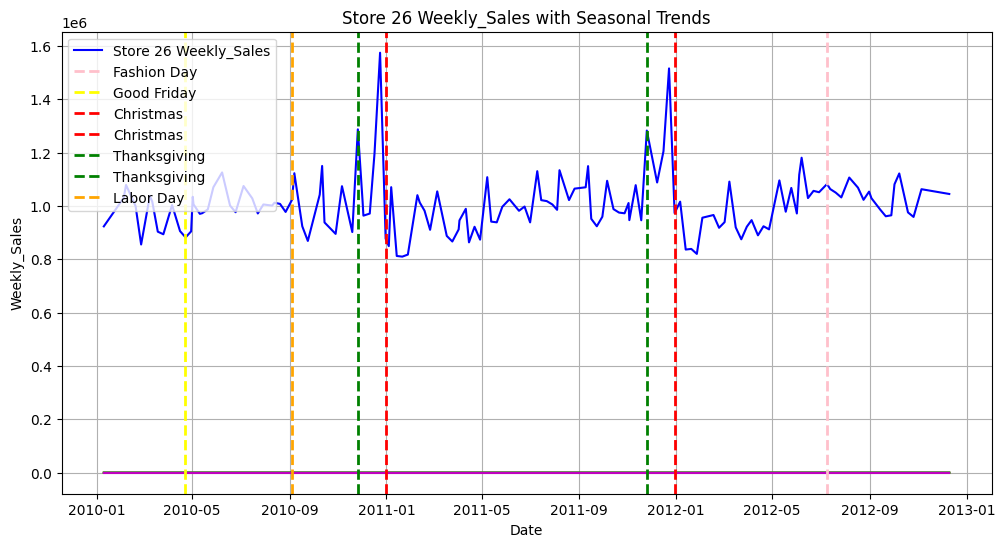

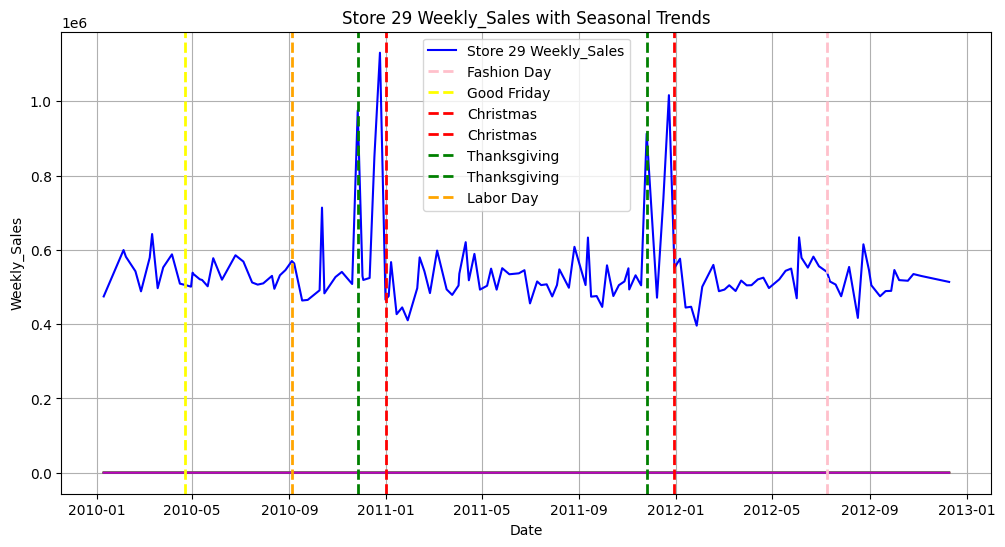

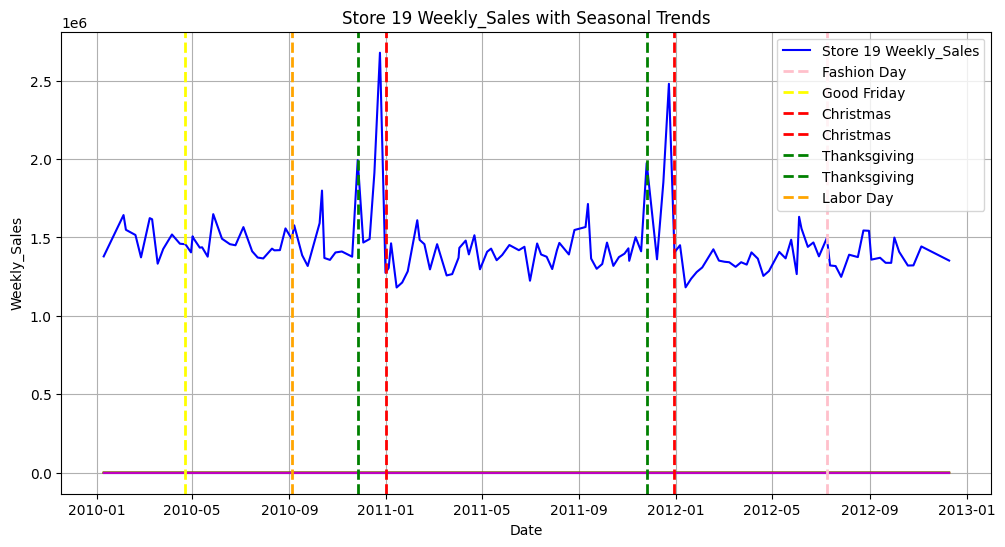

In [122]:
# Sort the data by 'Date'
df = df.sort_values(by='Date')
   # Iterate through each store
for store in df['Store'].unique():
    store_info = df[df['Store'] == store]

    # Set 'Date' as the index
    store_info.set_index('Date', inplace=True)

    # Plot the weekly sales data for each store to identify seasonal trends
    plt.figure(figsize=(12, 6))
    plt.plot(store_info['Weekly_Sales'], label=f'Store {store} Weekly_Sales', color='blue')
    plt.plot(store_info['Holiday_Flag'], color='Orange')
    plt.plot(store_info['Temperature'], color='red')
    plt.plot(store_info['Fuel_Price'], color='c')
    plt.plot(store_info['CPI'], color='g')
    plt.plot(store_info['Unemployment'], color='m')

    plt.title(f'Store {store} Weekly_Sales with Seasonal Trends')
    plt.xlabel('Date')
    plt.ylabel('Weekly_Sales')
    plt.grid(True)

    # vertical lines to indicate potential seasonal reasons (e.g., holidays)
    plt.axvline(pd.to_datetime ('2012-07-09'), color='pink', linestyle='--', label="Fashion Day", linewidth=2)
    plt.axvline(pd.to_datetime ('2010-04-22'), color='yellow', linestyle='--', label="Good Friday", linewidth=2)
    plt.axvline(pd.to_datetime ('2010-12-31'), color='red', linestyle='--', label="Christmas", linewidth=2)
    plt.axvline(pd.to_datetime ('2011-12-30'), color='red', linestyle='--', label="Christmas", linewidth=2)
    plt.axvline(pd.to_datetime('2010-11-26'), color='green', linestyle='--', label='Thanksgiving', linewidth=2)
    plt.axvline(pd.to_datetime('2011-11-25'), color='green', linestyle='--', label='Thanksgiving', linewidth=2)
    plt.axvline(pd.to_datetime('2010-09-04'), color='orange', linestyle='--', label='Labor Day', linewidth=2)

    plt.legend()
    plt.show()

c. Does temperature affect the weekly sales in any manner?

From the graph given below , it shows that both higher and lower temperatures affect the Weekly Sales.

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

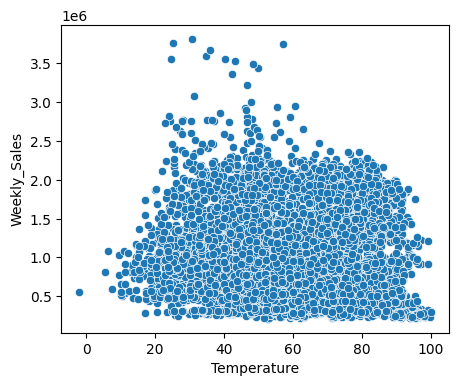

In [123]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Temperature'],y=df['Weekly_Sales'])

d. How is the Consumer Price index affecting the weekly sales of various stores?

Text(0.5, 1.0, 'Graph between CPI and Weekly_Sales')

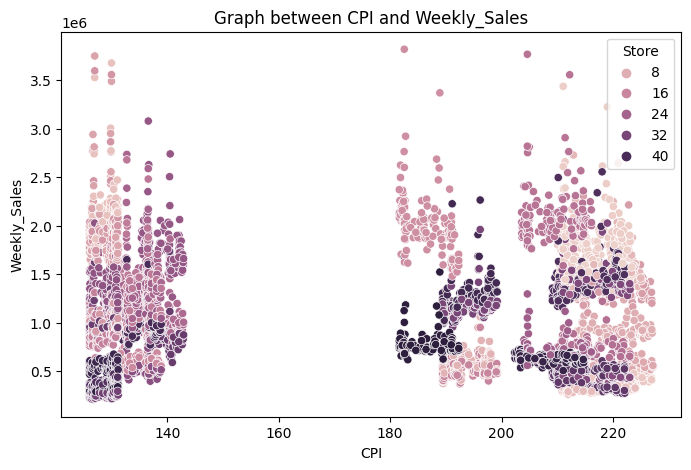

In [124]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['CPI'],y=df['Weekly_Sales'],hue=df['Store'])
plt.title("Graph between CPI and Weekly_Sales")

Store 32 and 40 , weekly sales decreases as CPI value increases.
Store 24 does not have any significant difference whether the CPI increases or decrease.

e. Top performing stores according to the historical data.

<Axes: title={'center': 'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

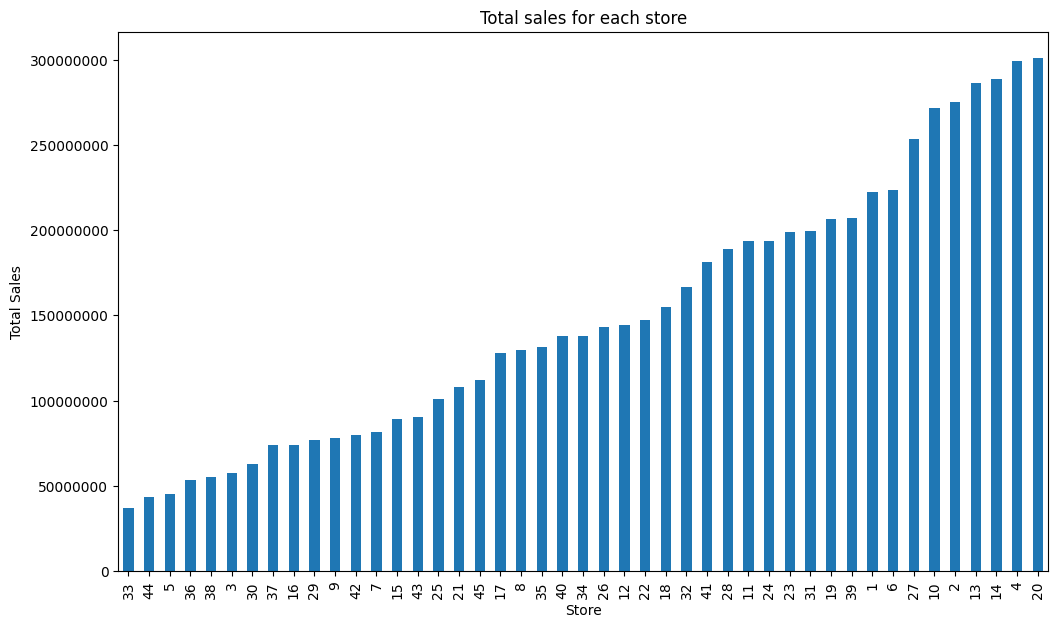

In [125]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values()
plt.figure(figsize=(12,7))
plt.xticks(rotation=60)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

Store 20 has maximum Weekly Sales and Store 33 has minimum Weekly Sales.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [126]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum()
max_sales=total_sales.max()
min_sales=total_sales.min()
diff = max_sales - min_sales
print("The difference between the highest and lowest performing stores",diff)

The difference between the highest and lowest performing stores 264237570.49999997


2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [127]:
data= df[['Date','Weekly_Sales']]
data = data.set_index('Date')
data = data.groupby('Date').sum().sort_values('Date')
data.head(2)

Weekly_Sales
Date                    
2010-01-10   42239875.87
2010-02-04   50423831.26

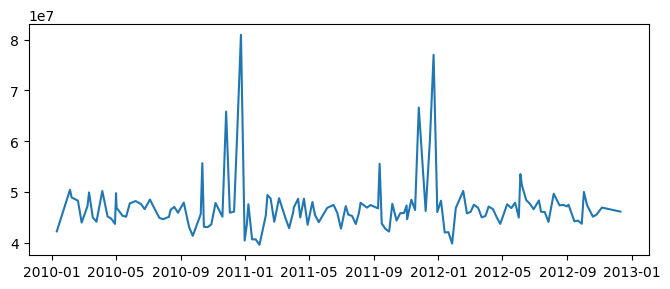

In [168]:
#Weekly sales with time
plt.figure(figsize=(8,3))
plt.plot(data.Weekly_Sales)

In [169]:
data.isnull().sum()

Weekly_Sales    0
dtype: int64

In [170]:
data.shape

(143, 1)

In [131]:
data.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='Date', length=143)

In [132]:
data.duplicated().sum()

0

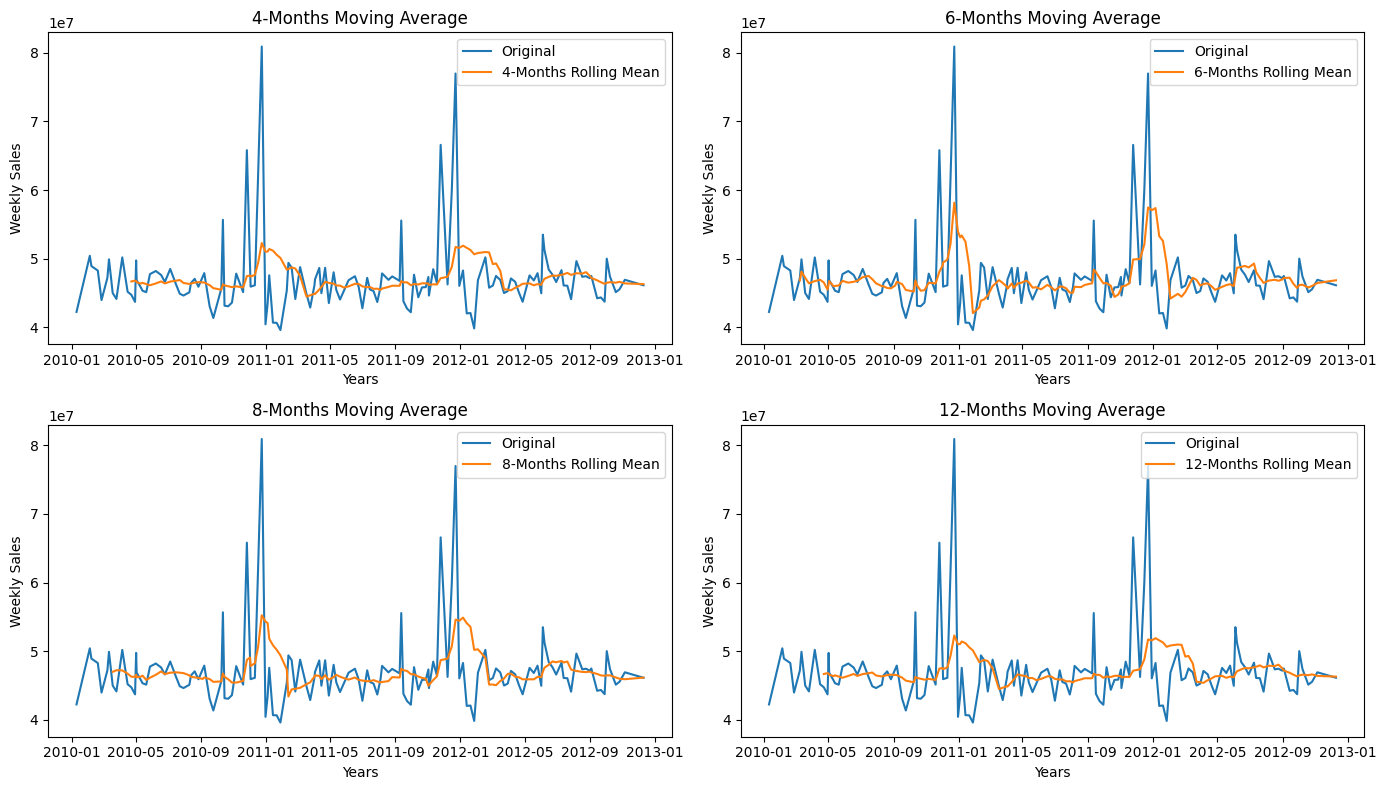

In [133]:
#Different plots of Original sales and Rolling mean of Original sales with different windows.
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(data.index, data, label='Original');
axes[0][0].plot(data.index,data.rolling(window=12).mean(), label='4-Months Rolling Mean');
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best')

axes[0][1].plot(data.index, data, label='Original');
axes[0][1].plot(data.index, data.rolling(window=6).mean(), label='6-Months Rolling Mean');
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(data.index, data, label='Original');
axes[1][0].plot(data.index, data.rolling(window=8).mean(), label='8-Months Rolling Mean');
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(data.index, data, label='Original');
axes[1][1].plot(data.index, data.rolling(window=12).mean(), label='12-Months Rolling Mean');
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show();

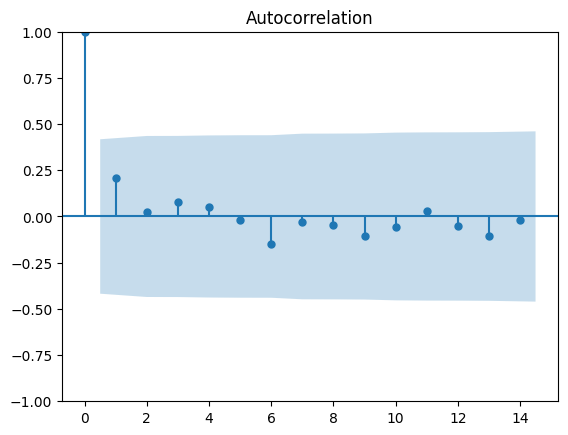

In [134]:
# Model Building
#ACF PLOT
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_plot=acf(data.dropna())
plot_acf(acf_plot);


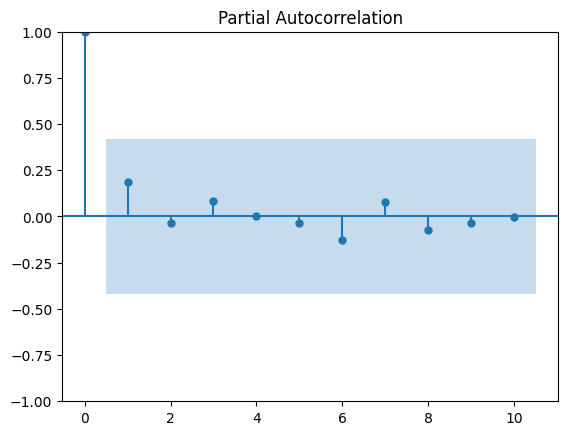

In [135]:
#PACF Plot
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(data.dropna())
plot_pacf(pacf_plot,lags =10);

In [136]:
data.head(2)

Weekly_Sales
Date                    
2010-01-10   42239875.87
2010-02-04   50423831.26

In [137]:

#df.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:20


Weekly_Sales    float64
dtype: object

In [138]:
roll_mean = data['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = data['Weekly_Sales'].rolling(window=2, center=False).std()

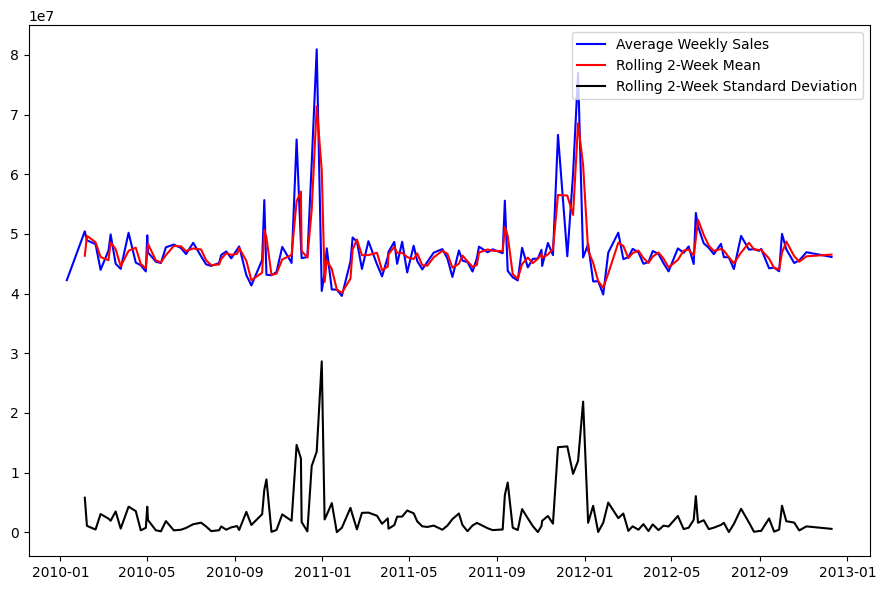

In [139]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(data['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [140]:
# Checking whether the given series is stationary or not.
data['Weekly_Sales_Diff'] = data['Weekly_Sales'] - data['Weekly_Sales'].shift(1)
result = adfuller(data['Weekly_Sales_Diff'].dropna())
if result[1] <= 0.05:
    print("Time series is stationary.")
else:
    print("Time series is not stationary. You may need to difference again or apply other transformations.")


Time series is stationary.


In [141]:
data.head(2)

Weekly_Sales  Weekly_Sales_Diff
Date                                       
2010-01-10   42239875.87                NaN
2010-02-04   50423831.26         8183955.39

In [142]:
data = data.drop(columns=['Weekly_Sales_Diff'],axis =1)

In [143]:
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [144]:
#Finding the optimal values of p,d,q.
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5424.7871794794755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4882.833488239872
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4509.049045897482
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4089.897941540664
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4543.066324442394
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4510.912964178737
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4102.320621290806
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4076.336850811576
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5290.960410872044
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4821.007627240761
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4470.405793548987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4039.982067832913
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4880.624061865667
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4807.935032636489
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4103.468065133093
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4035.4014363513197
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4843.92831136518
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4443.4995459963175
ARIMA(0,

In [145]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 -
#ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4071.244175472755

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7298      0.038    -19.395      0.000      -0.804      -0.656
sigma2      6.651e+13   3.23e-17   2.06e+30      0.000    6.65e+13    6.65e+13


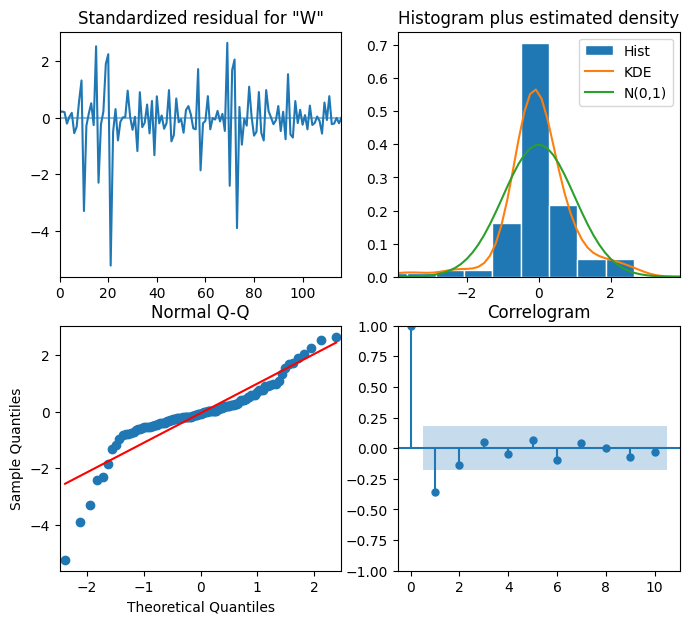

In [146]:
results.plot_diagnostics(figsize=(8, 7))
plt.show()

In [147]:
pred = results.get_prediction(start='05-02-2010', dynamic=False)
pred_ci = pred.conf_int()

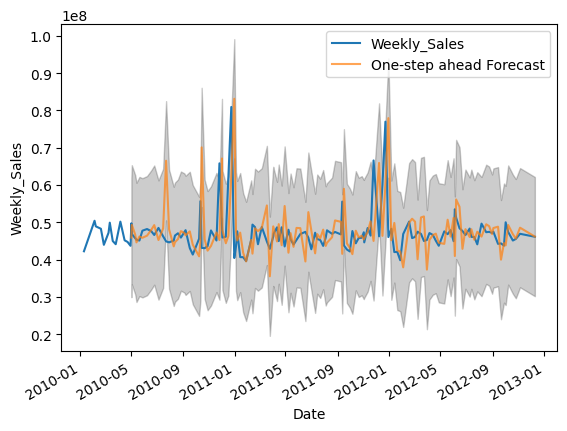

In [148]:
ax = data['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly_Sales')
plt.legend()

plt.show()

In [149]:
pred_data=pd.DataFrame(pred.predicted_mean)
pred_data.head(2)

predicted_mean
Date                      
2010-05-02    4.591631e+07
2010-05-03    4.934375e+07

In [150]:
data['2010-05-02':]

Weekly_Sales
Date                    
2010-05-02   49750740.50
2010-05-03   46871470.30
2010-05-11   45781981.89
2010-05-14   45330080.20
2010-05-21   45120108.06
...                  ...
2012-10-08   47403451.04
2012-10-19   45122410.57
2012-10-26   45544116.29
2012-11-05   46925878.99
2012-12-10   46128514.25

[130 rows x 1 columns]

In [151]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2010-05-02'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

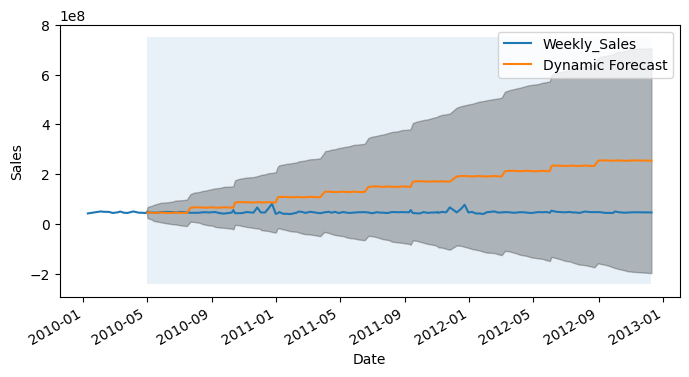

In [152]:
ax = data['2010':].plot(label='observed', figsize=(8, 4))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-05-02'), data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [153]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

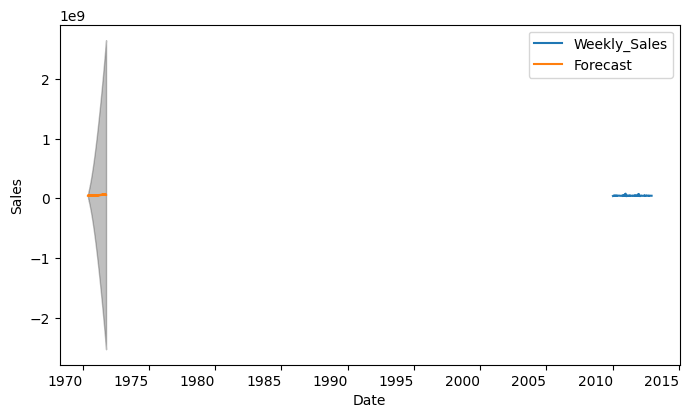

In [154]:
ax = data.plot(label='observed', figsize=(8, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [155]:
y_forecasted = pred_data
y_truth = data['2010-05-02':]

# Compute the mean square error
mse = ((y_forecasted.predicted_mean - y_truth.Weekly_Sales) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 69732662201348.34


In [156]:
adfuller(data['Weekly_Sales'])

(-9.837721580746782,
 4.845102849921085e-17,
 0,
 142,
 {'1%': -3.477261624048995,
  '5%': -2.8821181874544233,
  '10%': -2.5777431104939494},
 4342.775144198299)

In [157]:
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 1)
Test: (43, 1)


In [158]:
data2 =data.rename(columns={'Date':'ds','Weekly_Sales':'y'})

In [159]:
data2.head(2)

y
Date                   
2010-01-10  42239875.87
2010-02-04  50423831.26

In [160]:
#FB Prophet Model
data2 = data2.reset_index()
from prophet import Prophet

In [161]:
data2 = data2.rename(columns={'Date':'ds'})
data2

ds            y
0   2010-01-10  42239875.87
1   2010-02-04  50423831.26
2   2010-02-07  48917484.50
3   2010-02-19  48276993.78
4   2010-02-26  43968571.13
..         ...          ...
138 2012-10-08  47403451.04
139 2012-10-19  45122410.57
140 2012-10-26  45544116.29
141 2012-11-05  46925878.99
142 2012-12-10  46128514.25

[143 rows x 2 columns]

In [162]:
m= Prophet()
m.fit(data2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvploik8/lad5a7ck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvploik8/_s836nwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38245', 'data', 'file=/tmp/tmpmvploik8/lad5a7ck.json', 'init=/tmp/tmpmvploik8/_s836nwo.json', 'output', 'file=/tmp/tmpmvploik8/prophet_model8u45swi7/prophet_model-20231216045005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:50:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [185]:
future = m.make_future_dataframe(periods=84,freq='D')
future.tail(5)

ds
222 2013-02-28
223 2013-03-01
224 2013-03-02
225 2013-03-03
226 2013-03-04

In [181]:

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2010-01-10  4.296003e+07  3.832173e+07  4.818858e+07
1   2010-02-04  4.839826e+07  4.291577e+07  5.344842e+07
2   2010-02-07  5.114588e+07  4.611269e+07  5.644732e+07
3   2010-02-19  4.678282e+07  4.175995e+07  5.202040e+07
4   2010-02-26  4.567616e+07  4.064490e+07  5.082693e+07
..         ...           ...           ...           ...
222 2013-02-28  4.636253e+07  4.109568e+07  5.174016e+07
223 2013-03-01  4.621505e+07  4.134648e+07  5.172602e+07
224 2013-03-02  4.461666e+07  3.940297e+07  4.999019e+07
225 2013-03-03  4.850758e+07  4.322774e+07  5.360551e+07
226 2013-03-04  4.842053e+07  4.338225e+07  5.376087e+07

[227 rows x 4 columns]

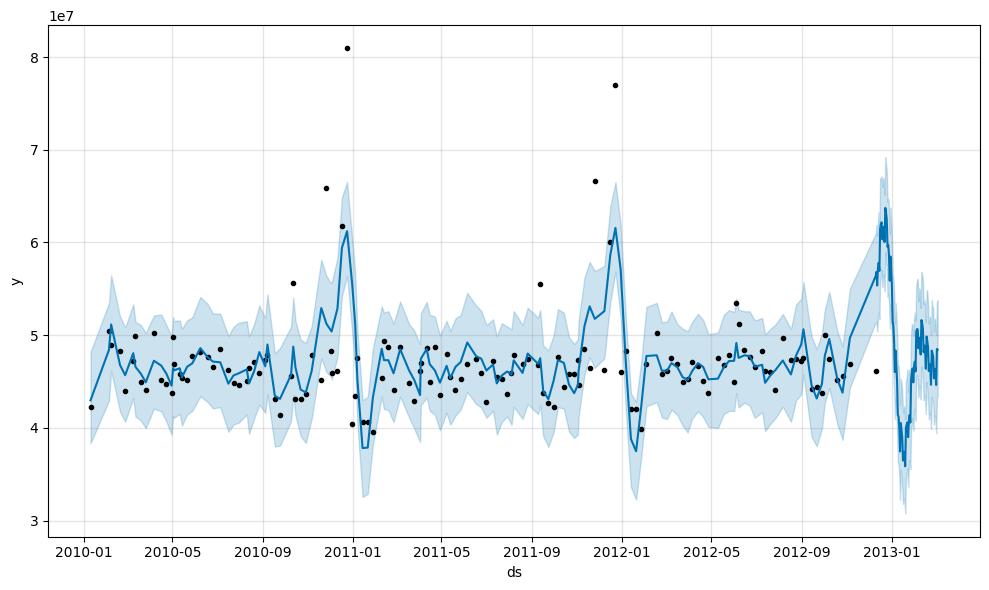

In [182]:
weekly_sales_forecast = m.plot(forecast)

In [183]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [186]:
forecast[['ds','yhat']].tail(12)#Sales Pediction

ds      yhat
215 2013-02-21  46883014
216 2013-02-22  46482581
217 2013-02-23  44648462
218 2013-02-24  48328446
219 2013-02-25  48061574
220 2013-02-26  47654293
221 2013-02-27  45342721
222 2013-02-28  46362531
223 2013-03-01  46215046
224 2013-03-02  44616658
225 2013-03-03  48507583
226 2013-03-04  48420525